# **Proyecto 2: ChurnInsight**

## **Objetivo**

Predicción de Cancelación de Clientes.
Analizar el comportamiento de clientes para identificar patrones asociados a la cancelación del servicio (churn), como base para entrenar un modelo predictivo.

## **Propuesta**

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.


Se realizará predicción mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

## **Resumen**

Empresa: Teleco
- Problema: Alta tasa de cancelación de clientes (churn)
- Objetivo del proyecto: Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

- La empresa quiere anticiparse al problema de la cancelación, respondiendo preguntas como:

1. ¿Quienes son los clientes con mayor riesgo de evasión?
2. ¿Qué variables influyen más en este comportamiento?
3. ¿Qué perfil de cliente debemos cuidar con mayor atención?

Este conocimiento es necesario para ayudar a implemenar acciones de retención y estrategias personalizadas

# A. Preparar datos para el modelado (tratamiento, codificación, normalización).

##  📌 1-Extracción

###Fuente: Data Set de Kaggle: Telco Customer Churn – https://www.kaggle.com/datasets/blastchar/telco-customer-churn
URL_archivo = 'https://raw.githubusercontent.com/Rapd33/Proyecto-Hackaton-ONE-Equipo46/989ca82dbfaa72f74227b8af15068d6fcf401765/DataScience/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Ruta donde se aloja el archivo CSV en GitHub.

Formato uniforme destino: DataFrame

In [132]:
#Importar Librerías:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#archivo = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Establece una variable archivo con la ruta del archivo CSV .
URL_archivo = 'https://raw.githubusercontent.com/Rapd33/Proyecto-Hackaton-ONE-Equipo46/989ca82dbfaa72f74227b8af15068d6fcf401765/DataScience/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv' #Establece una variable archivo con la ruta donde se aloja el archivo CSV en GitHub.


df = pd.read_csv(URL_archivo)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##🔧 2-Transformación y Limpieza de datos

### Conociendo el conjunto de datos

In [133]:
#Cantidad de Filas y columnas
df.shape

(7043, 21)

In [134]:
# Columnas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [135]:
# Estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Diccionario de Datos

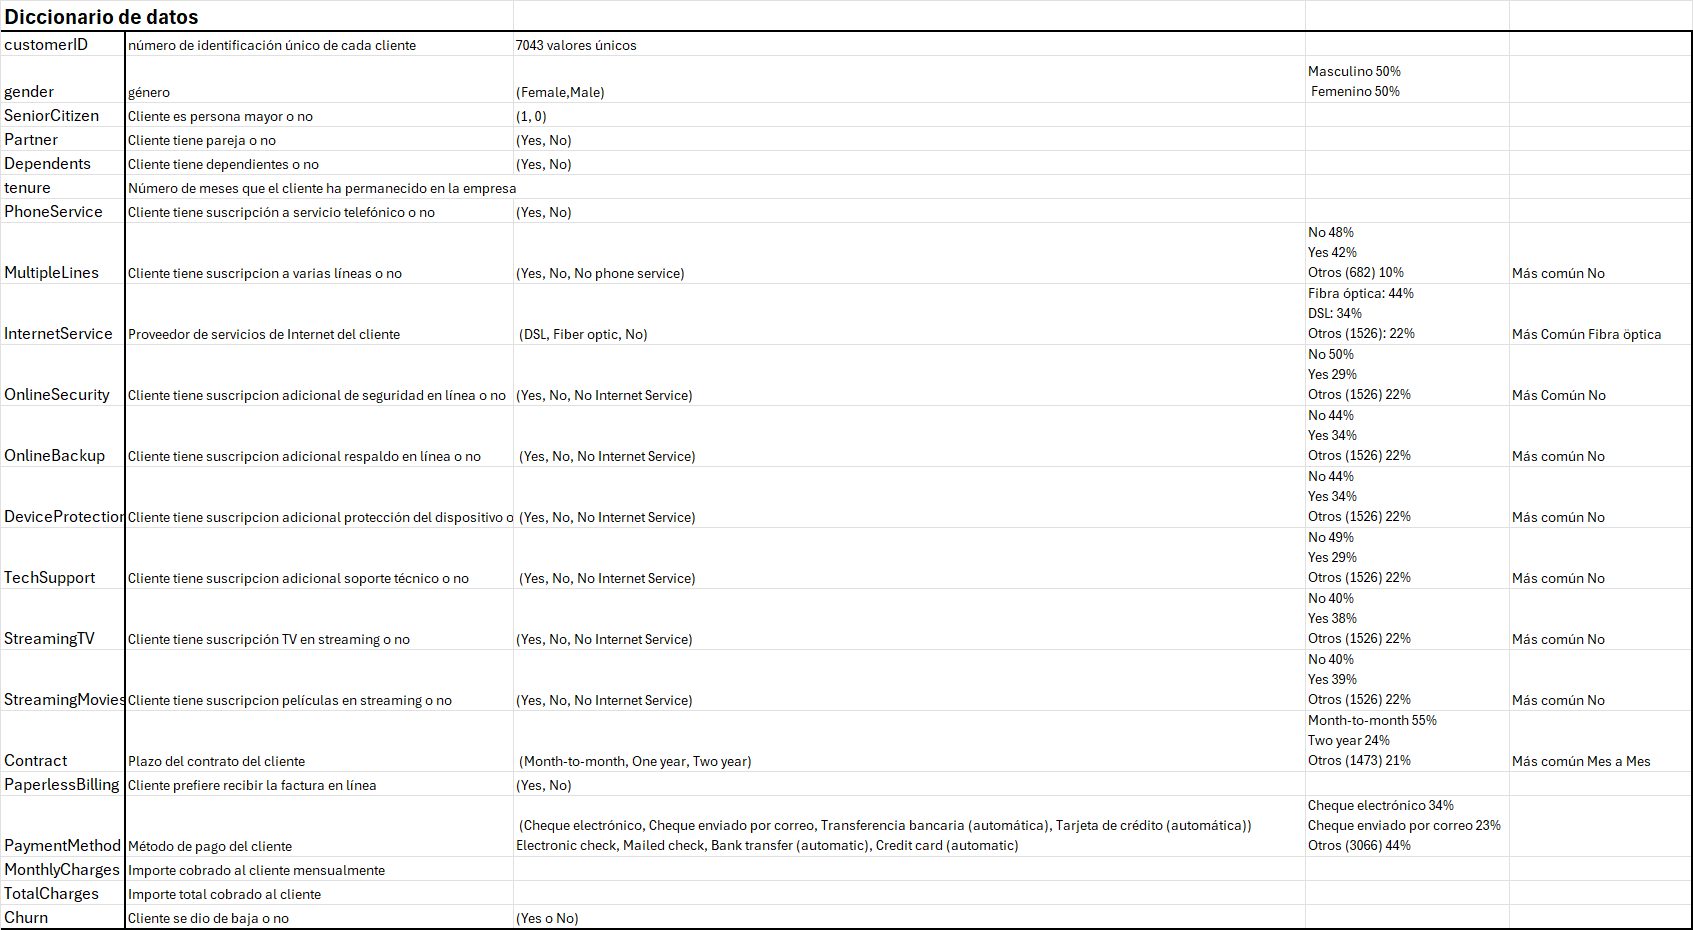

### Validar Calidad de los datos

### 1.Valores unicos

In [136]:
# Validar valores únicos por columna
for col in df.columns: # columns values unique:
  print(f"Columna '{col}': {df[col].nunique()}")
  if df[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df[col].unique()))

  print('-' * 60) # dividir secciones

Columna 'customerID': 7043
------------------------------------------------------------
Columna 'gender': 2
gender: ['Female' 'Male']
------------------------------------------------------------
Columna 'SeniorCitizen': 2
SeniorCitizen: [0 1]
------------------------------------------------------------
Columna 'Partner': 2
Partner: ['Yes' 'No']
------------------------------------------------------------
Columna 'Dependents': 2
Dependents: ['No' 'Yes']
------------------------------------------------------------
Columna 'tenure': 73
------------------------------------------------------------
Columna 'PhoneService': 2
PhoneService: ['No' 'Yes']
------------------------------------------------------------
Columna 'MultipleLines': 3
MultipleLines: ['No phone service' 'No' 'Yes']
------------------------------------------------------------
Columna 'InternetService': 3
InternetService: ['DSL' 'Fiber optic' 'No']
------------------------------------------------------------
Columna 'OnlineSe

### 2.Números duplicados

In [137]:
# Validar si hay numeros duplicado
duplicados = df.duplicated()
print(duplicados.sum())

0


### 3.Valores nulos

In [138]:
## Identificar valores nulos
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [139]:
# Validar si hay valores nulos
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


Valores nulos por columna:
Series([], dtype: int64)


### 4.Valores en blanco o vacios

In [140]:
# Validar si hay valores en blanco o vacios
valores_vacios = df.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(valores_vacios[valores_vacios > 0])

TotalCharges    11
dtype: int64


Validando o detectando anomalias

In [141]:
df['TotalCharges'].unique()[:20]

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8',
       '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25',
       '528.35', '1862.9'], dtype=object)

Se observa que este campo es de tipo string aunque sus valores se ven como números con decimales

In [142]:
# 11 registros en la columna TotalCharges
# posibles clientes raros
df[df['TotalCharges'].str.strip() == ''][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,
753,3115-CZMZD,0,20.25,
936,5709-LVOEQ,0,80.85,
1082,4367-NUYAO,0,25.75,
1340,1371-DWPAZ,0,56.05,
3331,7644-OMVMY,0,19.85,
3826,3213-VVOLG,0,25.35,
4380,2520-SGTTA,0,20.00,
5218,2923-ARZLG,0,19.70,
6670,4075-WKNIU,0,73.35,


### 5.Tipos de datos

##### Campo TotalCharges de object a float

In [143]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [144]:
# estos son clientes nuevos que no tienen permanencia
df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'Churn']].head(10)

,tenure,MonthlyCharges,Churn


Proceder a colocar con ceros los socios que tienen total charges null

In [145]:
#df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [146]:
# Reemplazar las cadenas vacías en la columna 'account.Charges.Total' con 0
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip().replace('', '0')

In [147]:
# Convertir la columna TotalCharges a tipo float
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)
display(df.dtypes)




,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [148]:
#Validando
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Estandarizacion

####🚧Remover columnas irrelevantes

Excluir variables que:

- No tienen valor predictivo.
- Son redundantes con otras.
- Pueden causar fuga de datos.

In [149]:
# creacion df copia para depurar datos
df_depurado = df.copy()

In [150]:
# ID Identificador de Cliente
df_depurado = df_depurado.drop(columns=['customerID'])

####🚧Agrupación de No y No service

    🎯 Objetivo

    Reducir *multicolinealidad* y simplificar los datos sin perder relevancia para el modelo predictivo.

    Varias variables de suscripcion, tenían tres categorías:

    "Yes" → cliente usa el servicio
    "No" → cliente tiene internet, pero no contrató el servicio
    "No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio

    Esto generaba multicolinealidad perfecta al transformar estas categorías en dummies, lo que:

    Creaba correlación 1.0 entre variables
    Generaba VIF infinito
    Comprometía la estabilidad y el rendimiento de los modelos
    ✅ La solución: agrupar "No internet service" como "No"

    "Yes" = usa el servicio
    "No" = no usa el servicio (por cualquier motivo)

    Esto reduce la dimensionalidad y evita multicolinealidad.


In [151]:
# 1: Agrupar "No internet service" como "No"
columns_suscripcion = [
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies'

]

# Todas las suscripciones anteriores tienen los valores ['No' 'Yes' 'No internet service']
# No se incluye el campo 'Suscripcion_Multiples_Lineas' porque tiene estos valores y no se puede unificar el ultimo con No ['No' 'Yes' 'No phone service']

for col in columns_suscripcion:
    df_depurado[col] = df_depurado[col].replace('No internet service', 'No')

In [152]:
# Verificación
for col in columns_suscripcion:
    print(f"{col}: {df_depurado[col].unique()}")
print(f"{'MultipleLines'}: {df_depurado['MultipleLines'].unique()}")

OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']


In [153]:
df_depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


##  📌 2.Análisis Exploratorio de datos (EDA)

### Analisis descriptivo

#### Datos numéricos

In [154]:
## Variables numericas en el dataframe df_depurado
 # Estadísticas descriptivas de las columnas numéricas de un DataFrame
df_depurado.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**1. SeniorCitizen (Adulto Mayor):**

- Conteo (count): 7043. Esto indica que no hay valores nulos en esta columna, o se han manejado previamente.
- Media (mean): 0.162. Dado que los valores son 0 o 1, esto significa que aproximadamente el 16.2% de los clientes en este conjunto de datos son adultos mayores.
- Desviación estándar (std): 0.368. Sugiere la dispersión de los datos binarios.
- Mínimo (min): 0, Máximo (max): 1. Confirma que es una variable binaria.
- Cuartiles (25%, 50%, 75%): Indican que el 75% de los clientes no son adultos mayores (valor 0).

**2. tenure (Meses de Contrato):**

- Conteo (count): 7043. No hay valores nulos.
- Media (mean): 32.37 meses. El cliente promedio ha estado con la compañía por poco menos de 3 años.
- Desviación estándar (std): 24.55. Hay una dispersión considerable en la duración de los contratos, lo que sugiere una mezcla de clientes nuevos y antiguos.
- Mínimo (min): 0 meses. Esto es un punto importante, ya que un tenure de 0 puede indicar clientes muy nuevos (que aún no han pasado un mes completo) o datos que necesitan ser verificados.
Máximo (max): 72 meses. Equivalente a 6 años, mostrando que la compañía tiene clientes muy leales.
- Cuartiles: El 25% de los clientes tiene 9 meses o menos, la mitad (50%) tiene 29 meses o menos, y el 75% ha estado con la compañía 55 meses o menos.

**3. MonthlyCharges (Cargos Mensuales):**

- Conteo (count): 7043. No hay valores nulos.
- Media (mean): 64.76. El cargo mensual promedio es de aproximadamente $64.76.
- Desviación estándar (std): 30.09. Hay una variabilidad significativa en los cargos mensuales, lo que podría deberse a diferentes paquetes de servicios o planes.
- Mínimo (min): 18.25, Máximo (max): 118.75. Muestra un rango amplio de precios.
- Cuartiles: El 25% de los clientes paga $35.50 o menos, la mitad (50%) paga $70.35 o menos, y el 75% paga $89.85 o menos.

**4. TotalCharges (Cargos Totales):**

- Conteo (count): 7043. No hay valores nulos, lo que confirma que los valores vacíos fueron reemplazados por 0.
- Media (mean): 2279.73. Los cargos totales promedio son de aproximadamente $2279.73.
- Desviación estándar (std): 2266.79. Hay una gran variabilidad, lo cual es esperado ya que depende del tiempo (tenure) y de los cargos mensuales (MonthlyCharges).
- Mínimo (min): 0.00. Esto es consistente con los clientes nuevos o aquellos que tenían valores vacíos originalmente.
Máximo (max): 8684.80. Muestra clientes con altos cargos totales a lo largo del tiempo.
- Cuartiles: El 25% de los clientes tiene cargos totales de $398.55 o menos, la mitad (50%) de $1394.55 o menos, y el 75% de $3786.60 o menos.

En resumen, a partir de estos datos, podemos inferir que:

- Tenemos un porcentaje relativamente bajo de adultos mayores en la base de clientes.
- Existe una combinación de clientes nuevos y de larga data, con una duración promedio de contrato moderada.
- Hay una amplia gama de cargos mensuales y totales, lo que sugiere diversidad en los servicios o planes contratados por los clientes y en el tiempo que han permanecido con la compañía.
- El tenure mínimo de 0 y TotalCharges mínimo de 0 son consistentes y reflejan clientes muy nuevos o la imputación realizada.

In [155]:
import plotly.express as px

fig = px.box(df_depurado, x='SeniorCitizen', y='Churn', color='Churn',
             title='Distribución de Senior Citizen (SeniorCitizen) por Churn',
             labels={'Churn': 'Churn', 'SeniorCitizen': 'SeniorCitizen'},
             orientation='h') # Added orientation='h' for horizontal boxplot
fig.update_layout(showlegend=False)
fig.show()

In [156]:
import plotly.express as px

fig = px.box(df_depurado, x='Churn', y='tenure', color='Churn',
             title='Distribución de Tenencia (Tenure) por Churn',
             labels={'Churn': 'Cancelación', 'tenure': 'Tenencia (Meses)'})
fig.update_layout(showlegend=False) # Hide legend if color is already in x-axis
fig.show()

In [157]:
import plotly.express as px

fig = px.box(df_depurado, x='MonthlyCharges', y='Churn', color='Churn',
             title='Distribución de Cargos Mensuales (MonthlyCharges) por Churn',
             labels={'Churn': 'Cancelación', 'MonthlyCharges': 'Cargos Mensuales'},
             orientation='h') # Added orientation='h' for horizontal boxplot
fig.update_layout(showlegend=False)
fig.show()

In [158]:
import plotly.express as px

fig = px.box(df_depurado, x='TotalCharges', y='Churn', color='Churn',
             title='Distribución de Cargos Totales (TotalCharges) por Churn',
             labels={'Churn': 'Cancelación', 'TotalCharges': 'Cargos Totales'},
             orientation='h') # Added orientation='h' for horizontal boxplot
fig.update_layout(showlegend=False)
fig.show()

#### Datos categoricos

In [159]:
df_depurado.describe(include='O') # Estadísticas descriptivas para las variables del tipo “object” - categoricas

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,2,2,2,2,2,2,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174


Para cada columna categórica, nos muestra la siguiente información:

**-count (Conteo)**: Indica el número de valores no nulos en esa columna. En tu caso, todas las columnas tienen 7043, lo que significa que no hay valores faltantes después de tu preprocesamiento.

**-unique (Únicos)**: Muestra la cantidad de valores distintos que hay en esa columna. Por ejemplo, gender tiene 2 valores únicos ('Male', 'Female'), mientras que PaymentMethod tiene 4.

**-top (Valor más frecuente)**: Es el valor que aparece con mayor frecuencia en la columna. Por ejemplo, en gender el valor top es 'Male', y en Contract es 'Month-to-month'.

**-freq (Frecuencia del valor más frecuente)**: Indica cuántas veces aparece el top valor en la columna. Así, 'Male' aparece 3555 veces y 'Month-to-month' aparece 3875 veces.

***Analizando los datos específicos se tiene:***

**1. gender**: Hay 2 géneros únicos, siendo 'Male' el más frecuente con 3555 ocurrencias, lo que sugiere una distribución casi equitativa entre géneros.

**2. Partner y Dependents**: Ambas tienen 2 valores únicos ('Yes', 'No'). Para Partner, 'No' es el más frecuente (3641), y para Dependents, 'No' también es el más frecuente (4933). Esto indica que la mayoría de los clientes no tienen pareja y no tienen dependientes.

**3. PhoneService**: Tiene 2 valores únicos, 'Yes' es el más frecuente (6361), lo que significa que la gran mayoría de los clientes tienen servicio telefónico.

**4. MultipleLines**: Tiene 3 valores únicos, siendo 'No' el más frecuente (3390). Esto incluye a quienes tienen servicio de teléfono pero una sola línea.

**5. InternetService**: Tiene 3 valores únicos, 'Fiber optic' es el más frecuente (3096), lo que sugiere que es un servicio popular entre los clientes.

**6. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies**: Todas estas variables tienen 2 valores únicos ('No', 'Yes') después de agrupar 'No internet service' como 'No'. En todas ellas, 'No' es el valor más frecuente, indicando que la mayoría de los clientes no tienen estos servicios adicionales.

**7. Contract**: Tiene 3 valores únicos, siendo 'Month-to-month' el más frecuente (3875), lo que podría indicar una menor lealtad o un mayor riesgo de Churn entre estos clientes.

**8. PaperlessBilling**: Tiene 2 valores únicos, 'Yes' es el más frecuente (4171), lo que sugiere que la facturación electrónica es popular.

**9. PaymentMethod**: Tiene 4 valores únicos, siendo 'Electronic check' el más frecuente (2365).

**10. Churn**: Tiene 2 valores únicos, 'No' es el más frecuente (5174). Esto confirma que la mayoría de los clientes no han cancelado el servicio, pero también resalta el desequilibrio de clases.

En general, este analisis inicial nos da una excelente visión de las características demográficas, los servicios contratados y los patrones de pago de los clientes, lo cual es fundamental para entender qué factores podrían influir en la cancelación del servicio.

#### Distribución de evasión (Activos / De baja) - Gráficos

Distribución de la variable "churn" (evasión) entre los clientes. Gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [160]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig_subplots = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'domain'}]],
                             subplot_titles=('Histograma de Cancelación', 'Distribución General de Cancelación (%)'))


# Generate data for the bar chart (counts of churn)
churn_counts = df_depurado['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Define a consistent mapping for text labels and colors
churn_map_labels = {'No': 'Activos', 'Yes': 'De Baja'}
churn_map_colors = {'Activos': 'blue', 'De Baja': 'red'}

churn_counts['Churn_Text'] = churn_counts['Churn'].map(churn_map_labels)

# Sort by the original 'Churn' column ('No' then 'Yes') for consistent plotting order
churn_counts = churn_counts.sort_values('Churn', ascending=False) # 'No' first, then 'Yes'

# Add bar traces for each churn category to the first subplot
for index, row in churn_counts.iterrows():
    fig_subplots.add_trace(go.Bar(x=[row['Churn_Text']], y=[row['Count']],
                                 text=[row['Count']], textposition='auto',
                                 marker_color=churn_map_colors[row['Churn_Text']],
                                 name=row['Churn_Text'],
                                 showlegend=True, legendgroup='group1'),
                              row=1, col=1)


# Prepare data for the pie chart (Overall Churn Percentage)
overall_churn_rate = df_depurado['Churn'].value_counts(normalize=True) * 100

# Ensure labels and colors match the sorted order
labels_pie = overall_churn_rate.index.map(churn_map_labels).tolist()
values_pie = overall_churn_rate.values.tolist()
pie_colors = [churn_map_colors[churn_map_labels[i]] for i in overall_churn_rate.index]

# Add pie chart trace to the second subplot
fig_subplots.add_trace(go.Pie(labels=labels_pie, values=values_pie, textinfo='percent+label', name='Cancelación General',
                              marker=dict(colors=pie_colors),
                              showlegend=True, legendgroup='group2'),
                       row=1, col=2)

# Update layout (main title and legend)
fig_subplots.update_layout(height=400, showlegend=True,
                           title=dict(text='Análisis de Cancelación', font=dict(size=18), x=0.5, xanchor='center'),
                           legend=dict(x=0.5, y=0.5, xanchor='center', yanchor='middle'))

# Show the combined figure
fig_subplots.show()

# Export the figure
fig_subplots.write_html("1.analisis_cancelacion.html")
print("Gráfico exportado como 'analisis_cancelacion.html'")

Gráfico exportado como 'analisis_cancelacion.html'


#### Distribución absoluta de la variable churn

In [161]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


##### Distribucion porcentual

In [162]:
df_depurado['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
No,73.463013
Yes,26.536987


##### Distribución de Churn

No: 5,174 clientes → 73.46%

Yes: 1,869 clientes → 26.54%

##### Explorar la Demografía vs Churn

In [163]:
pd.crosstab(df_depurado['gender'], df_depurado['Churn'], normalize='index') * 100

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


##### 🧠 Interpretación

Diferencia mínima (<1%)

👉 Género NO es un driver fuerte de churn

Esto es bueno: evita sesgos innecesarios

📌 Conclusión: variable débil, poco valor predictivo por sí sola.

###### SeniorCitizen vs Churn

In [164]:
pd.crosstab(df_depurado['SeniorCitizen'], df_depurado['Churn'], normalize='index') * 100

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


##### 🧠 Interpretación

Los adultos mayores churnean casi el doble

Diferencia: +18 puntos

📌 Insight de negocio

Los clientes senior necesitan mejor soporte, planes más simples o atención diferenciada.

###### Partner vs Churn


In [165]:
pd.crosstab(df_depurado['Partner'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


##### 🧠 Interpretación

Tener pareja reduce churn drásticamente

Estabilidad familiar = estabilidad como cliente

📌 Insight:

Clientes con pareja están más “anclados” al servicio.

##### Dependents vs Churn

In [166]:
pd.crosstab(df_depurado['Dependents'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


##### 🧠 Interpretación

Dependientes protegen aún más que la pareja

Clientes con hijos/personas a cargo valoran continuidad

📌 Insight fuerte:

Hogares familiares son los más leales.

##### 🧠 Conclusión

  Variable	Impacto
-> Gender	❌ Bajo
->SeniorCitizen	🔥 Alto
->Partner	🔥 Alto
->Dependents	🔥 Muy alto

#### Servicios vs Churn

##### InternetService vs Churn

In [167]:
pd.crosstab(df_depurado['InternetService'], df_depurado['Churn'], normalize='index') * 100

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


##### Servicios de valor agregado

In [168]:
services = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in services:
    print(f'\n{col}')
    print(pd.crosstab(df_depurado[col], df['Churn'], normalize='index') * 100)



OnlineSecurity
Churn                  No        Yes
OnlineSecurity                      
No              68.670382  31.329618
Yes             85.388806  14.611194

OnlineBackup
Churn                No        Yes
OnlineBackup                      
No            70.827915  29.172085
Yes           78.468506  21.531494

DeviceProtection
Churn                    No        Yes
DeviceProtection                      
No                71.348193  28.651807
Yes               77.497936  22.502064

TechSupport
Churn               No        Yes
TechSupport                      
No           68.813763  31.186237
Yes          84.833659  15.166341

StreamingTV
Churn               No        Yes
StreamingTV                      
No           75.668819  24.331181
Yes          69.929812  30.070188

StreamingMovies
Churn                   No        Yes
StreamingMovies                      
No               75.620506  24.379494
Yes              70.058565  29.941435


##### **Servicios vs Churn (Interpretación)**
### 🔐 OnlineSecurity

Estado	Churn %

No	41.77% 🚨

Yes	14.61% ✅

No internet service	7.40%

🧠 Lectura

No tener seguridad casi triplica el churn

**Es uno de los drivers más fuertes**

Servicio altamente protector

### 💾 OnlineBackup

Estado	Churn %

No	39.93%

Yes	21.53%

No internet service	7.40%


📌 Menos fuerte que seguridad, pero sigue siendo clave.

### 📱 DeviceProtection

Estado	Churn %

No	39.13%

Yes	22.50%


👉 Protege, pero no tanto como seguridad o soporte.

### 🛠️ TechSupport (MUY IMPORTANTE)

Estado	Churn %

No	41.64% 🚨

Yes	15.17% ✅


**🔥 Segundo driver más fuerte junto a OnlineSecurity**

📌 Insight claro:

Clientes sin soporte técnico se van cuando algo falla.

### 📺 StreamingTV / Movies

Servicio	Churn % (Yes)

StreamingTV	~30%

StreamingMovies	~30%


🧠 Interpretación:

Poco impacto real

Son servicios “nice to have”

No retienen clientes

###🌐 “No internet service”

| Churn % | 7.40% |

👉 Clientes sin internet:

Servicio **simple**

Factura baja

Muy estables

#### **Contrato y pagos (EL DRIVER #1)**




#### Contract vs Churn

In [169]:
pd.crosstab(df_depurado['Contract'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


#### PaymentMethod vs Churn

In [170]:
pd.crosstab(df_depurado['PaymentMethod'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


#### PaperlessBilling vs Churn

In [171]:
pd.crosstab(df_depurado['PaperlessBilling'], df_depurado['Churn'], normalize='index') * 100


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


#### Contrato y Pagos (worst offender #1)
📑 Contract vs Churn (worst offender)
Contrato	Churn %

**Month-to-month	42.71% 🚨🚨🚨**

One year	11.27%

Two year	2.83% ✅

🧠 Interpretación

Contrato mensual = cliente sin compromiso

Contrato 2 años = cliente casi imposible de perder

📌 Insight clave:

El churn NO es aleatorio, está estructuralmente ligado al tipo de contrato.

#### 💳 PaymentMethod vs Churn

| Método               | Churn %       |
| -------------------- | ------------- |
| Electronic check     | **45.29%** 🚨 |
| Mailed check         | 19.11%        |
| Bank transfer (auto) | 16.71%        |
| Credit card (auto)   | 15.24%        |

🧠 Interpretación

Electronic check es altísimo riesgo

Pagos automáticos = retención

📌 Insight:

Fricción en el pago = churn.


#### PaperlessBilling vs Churn

| Facturación electrónica | Churn %    |
| ----------------------- | ---------- |
| Yes                     | **33.57%** |
| No                      | 16.33%     |

🧠 Interpretación:

Paperless billing no es causa directa

Está correlacionada con:

Contrato mensual

Electronic check


#### impacto por variables

| Variable         | Impacto        |
| ---------------- | -------------- |
| Contract         | 🔥🔥🔥🔥       |
| PaymentMethod    | 🔥🔥🔥         |
| PaperlessBilling | 🔥 (indirecto) |




#### Variables numéricas

##### Tenure vs Churn

In [172]:
df_depurado.groupby('Churn')['tenure'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


MonthlyCharges vs Churn

In [173]:
df.groupby('Churn')['MonthlyCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


TotalCharges vs Churn

In [174]:
df.groupby('Churn')['TotalCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


#### Variables numéricas (Interpretación)



#####⏳ Tenure vs Churn (EL FACTOR TEMPORAL)

| Métrica | No Churn       | Churn          |
| ------- | -------------- | -------------- |
| Media   | **37.6 meses** | **18.0 meses** |
| Mediana | **38 meses**   | **10 meses**   |
| Q1      | 15             | 2              |


🧠 Lectura

Clientes que se van:

Son mucho más nuevos

La mitad se va antes del mes 10

Retención ocurre después de los primeros meses críticos

📌 Insight:

Si sobrevives el primer año, es muy probable que te quedes.

##### 💰 MonthlyCharges vs Churn
| Métrica | No    | Yes       |
| ------- | ----- | --------- |
| Media   | 61.27 | **74.44** |
| Mediana | 64.43 | **79.65** |



🧠 Lectura

Churn = facturas más altas

Clientes sienten que no vale lo que pagan

📌 Insight:

Precio alto sin servicios críticos = abandono.

##### 🧾 TotalCharges vs Churn

| Métrica | No          | Yes        |
| ------- | ----------- | ---------- |
| Mediana | **1679.53** | **703.55** |


🧠 Lectura

TotalCharges refleja tenure

Clientes churn:

Poco tiempo

Poco valor acumulado

👉 Variable útil, pero redundante con tenure.

# B. Análisis de correlación y selección de variables.

¿Cuáles factores están relacionados con el churn_yes = cancelacion? ¿Cómo es esa relación?

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

- 1: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.
- 0: no hay relación lineal entre las variables.
- 1: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.

## 🔍 Correlación entre variables

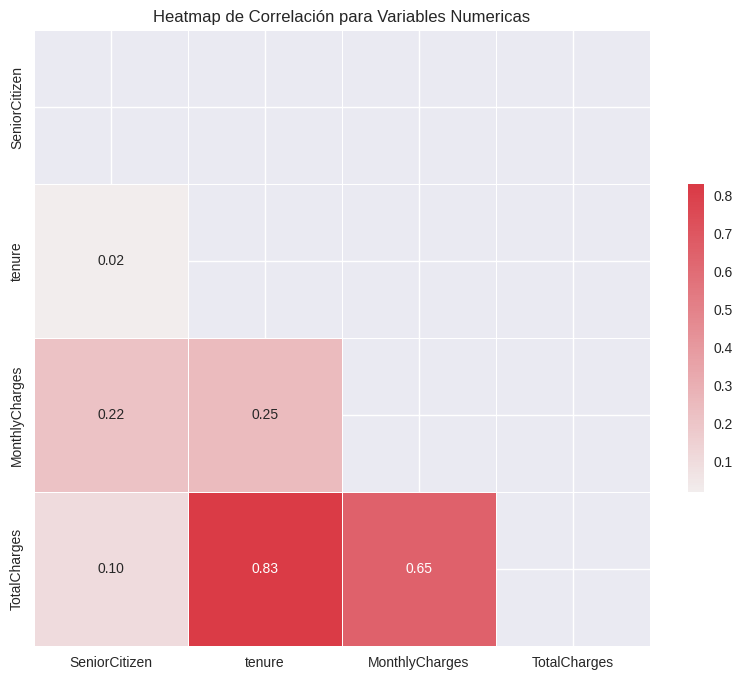

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista de columnas seleccionadas para continuar con los modelos y predicciones
columnas_numericas = df_depurado.select_dtypes(include=['int64', 'float64']).columns

# Seleccionar solo las columnas deseadas del DataFrame codificado
df_variables_numericas = df_depurado[columnas_numericas]

# Calcular la matriz de correlación para las columnas seleccionadas
corr_variables_numericas = df_variables_numericas.corr()

# Generar una máscara para el triángulo superior (opcional, para mejor visualización)
mascara = np.triu(np.ones_like(corr_variables_numericas, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(10, 8))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    np.round(corr_variables_numericas, 2), # Redondear valores para mejor lectura
    annot=True,                    # Mostrar valores en las celdas
    fmt=".2f",                     # Formato de los valores (2 decimales)
    cmap=cmap,                     # Mapa de colores
    center=0,                      # Centro del mapa de colores en 0
    square=True,                   # Celdas cuadradas
    linewidths=0.5,                # Líneas entre celdas
    cbar_kws={"shrink": 0.5},      # Barra de color
    mask=mascara                   # Aplicar máscara
)

plt.title('Heatmap de Correlación para Variables Numericas')
plt.show()

In [176]:
columnas_numericas

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Aqui se observa que es interesante analizar la mayor correlacion en las variables

¿Qué factores están más correlacionados?

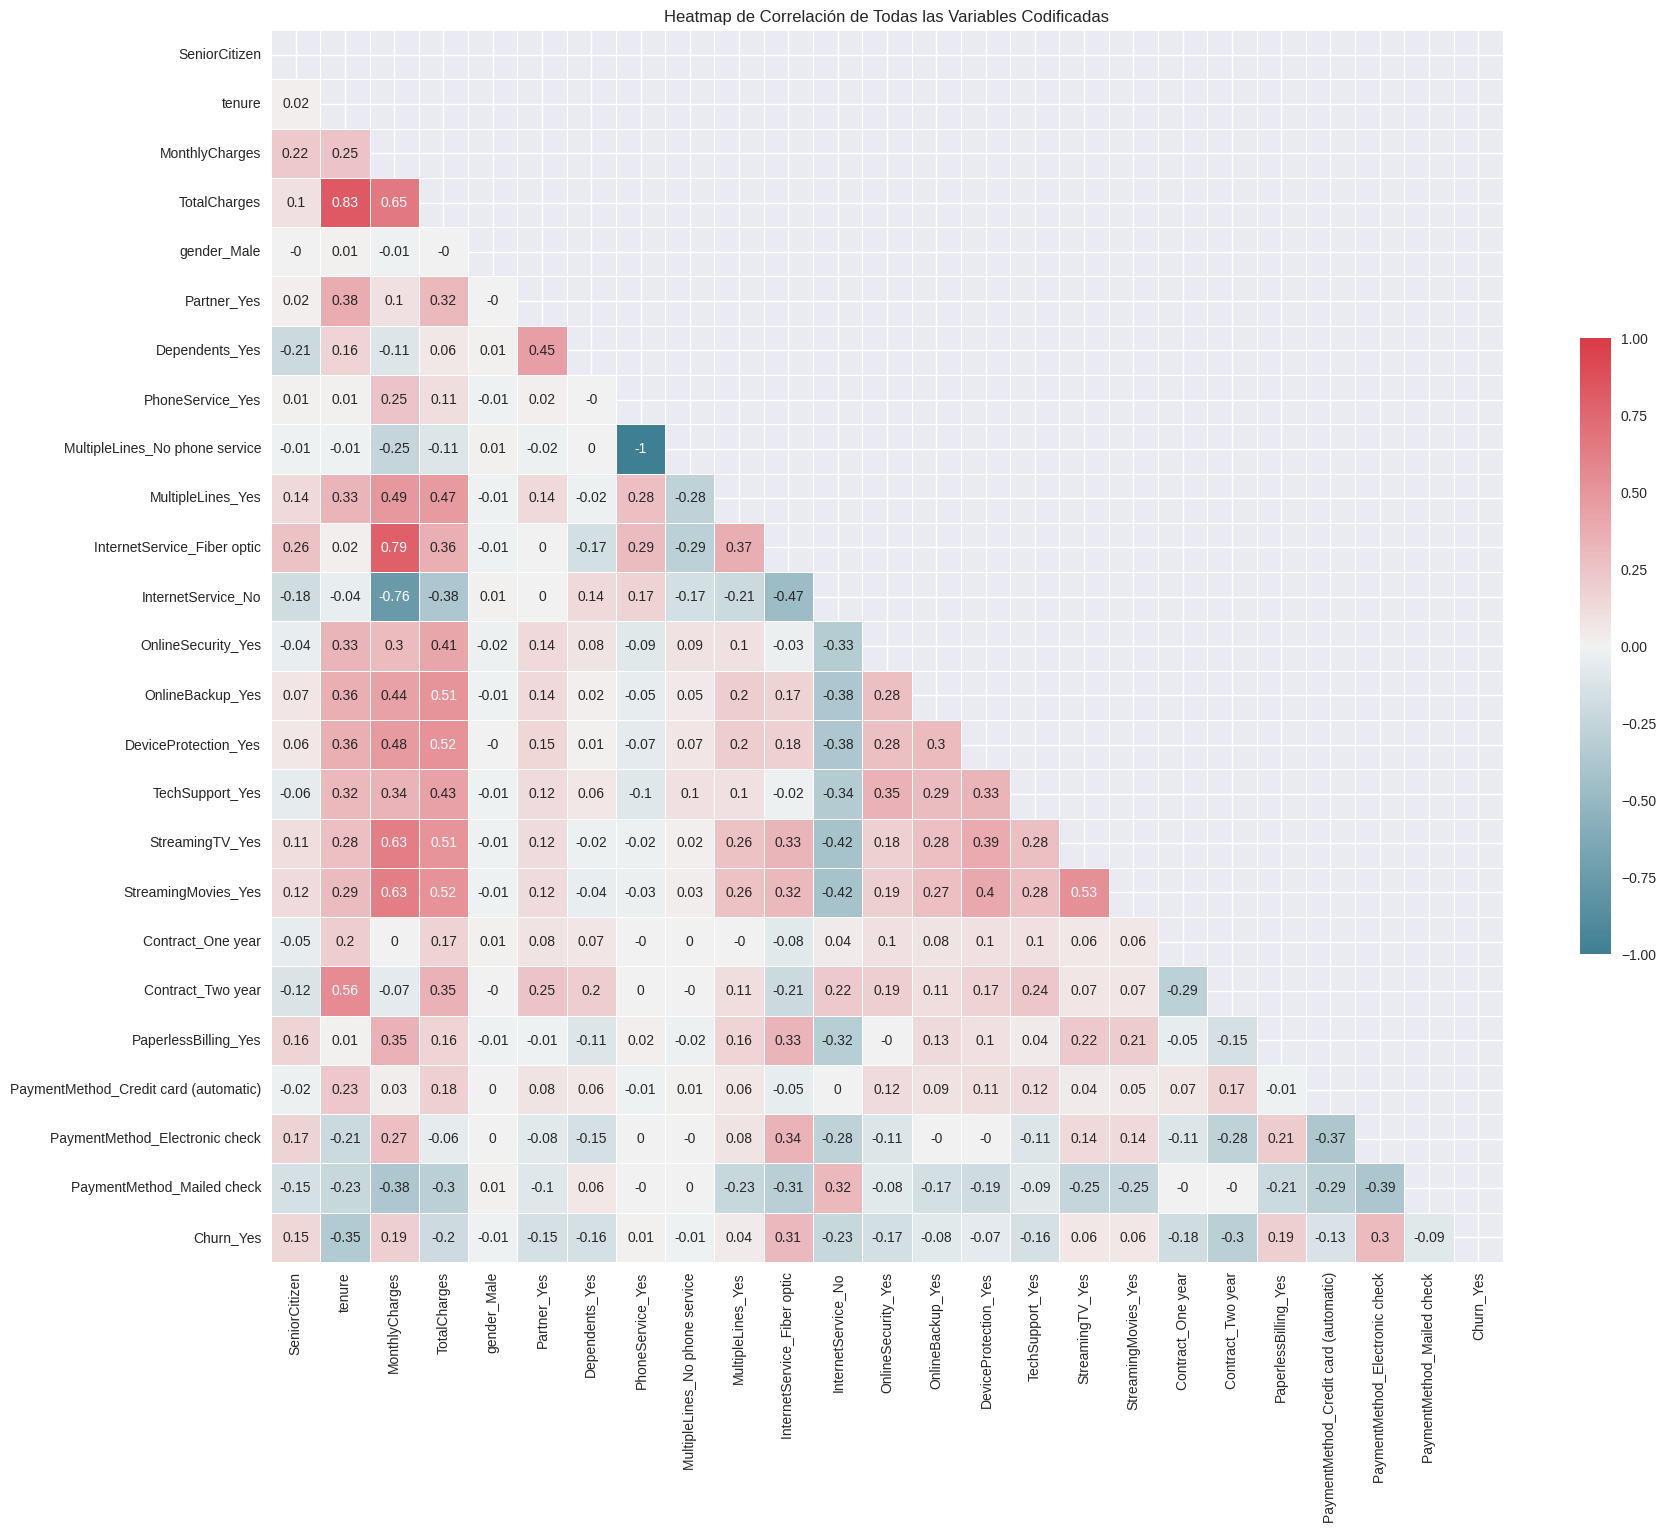

In [178]:
# Mapa de calor para ver las correlaciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Identificar columnas categóricas
columns_categoricas = df_depurado.select_dtypes(include='object').columns

# 2. Realizar One-Hot Encoding en df_depurado para crear df_encoded
# Se usa drop_first=True para evitar multicolinealidad perfecta en las dummies
df_encoded = pd.get_dummies(df_depurado, columns=columns_categoricas, drop_first=True)

# 3. Calcular la matriz de correlación del DataFrame codificado
corr = df_encoded.corr()

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(20,16))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(np.round(corr, 2), mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={'shrink': .5})

# Mostrar el mapa de calor (heatmap)
plt.title('Heatmap de Correlación de Todas las Variables Codificadas')
plt.show()

Genera muchos datos dificiles de interpetar y analizar, tiene muchos valores, columnas. Esta no es la manera mas sencilla de interpetar.

Entonces se aplica una mascara se filtra, usando una tasa para tener una correlacion mas cercana a nuestra variable churn_yes en mi caso Cancelacion_1.

Nota: Se pueden reordenar columnas de df, dejar al final la variable de respuesta al final, para que sea mas legible.

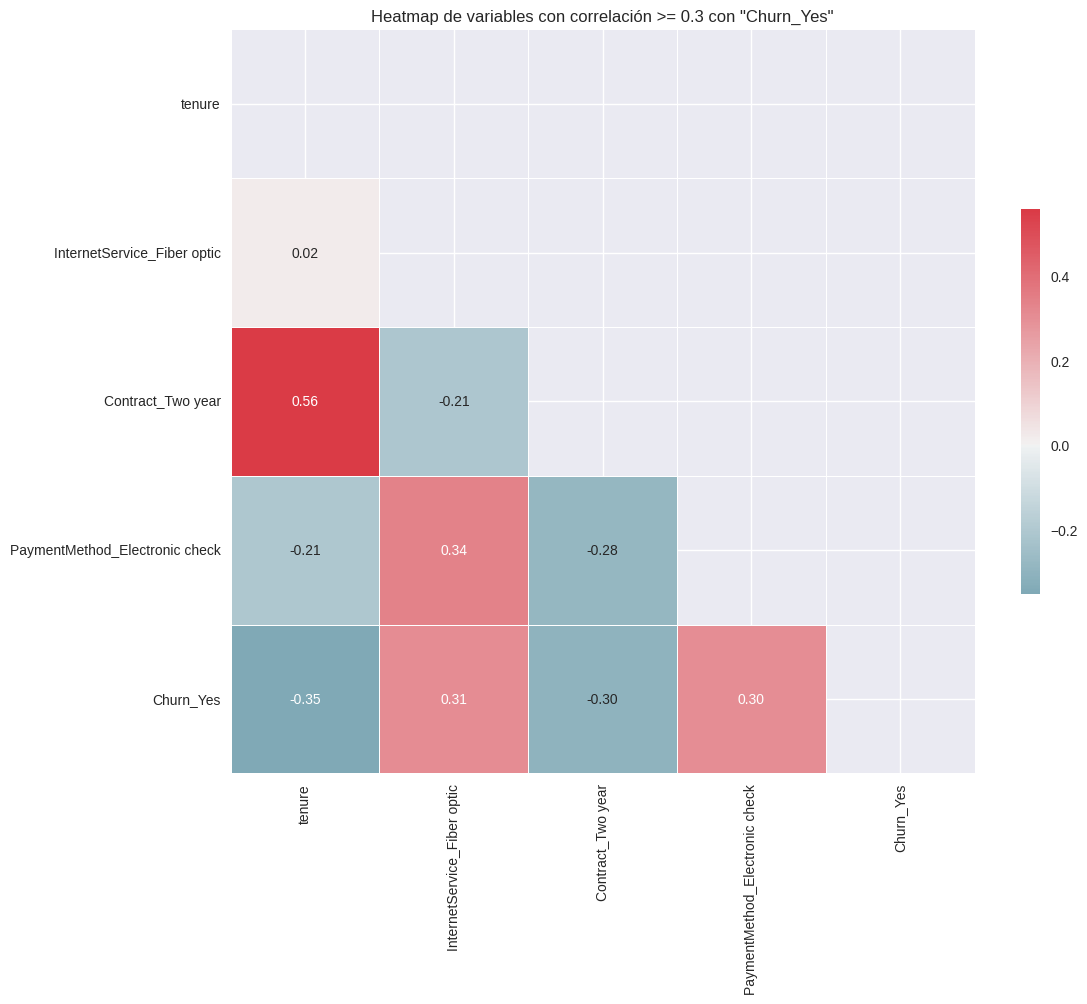

In [179]:
# Mapa de calor para ver las correlaciones mas cercanas a la variable Cancleacion_1 = Churn_Yes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_Yes'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.3  #0.07  # 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

Al ver los coeficientes de correlación de cada variable con `Churn_Yes`, vamos a identificar las variables con un coeficiente de correlación cuyo valor absoluto es mayor o igual a 0.30 y explicar qué podemos inferir de ellas.

*   **Correlación Positiva (coeficiente > 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación también tiende a aumentar.
*   **Correlación Negativa (coeficiente < 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación tiende a disminuir (o a medida que disminuye, la probabilidad de cancelación aumenta).


Aquí están las variables que cumplen ese criterio en los datos y su posible interpretación:

---

✅ **Análisis del heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.3** (o ≤ -0.3) con la variable objetivo `Churn_Yes`.

---

🔍 **Correlación con `Churn_Yes` (variable objetivo)**

| Variable                                    | Correlación con Churn_Yes            | Interpretación (Inferencia)                                                                                                                               |
| :------------------------------------------ | :----------------------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `tenure`                                    | **-0.35** Negativa (moderada a fuerte) | Cuanto mayor el tiempo como cliente (`tenure`), menor la probabilidad de `churn`. Esto es un patrón esperado: los clientes más antiguos son más leales.      |
| `InternetService_Fiber optic`               | **+0.31** Positiva (moderada)        | Los clientes con servicio de `Fibra Óptica` tienen una mayor probabilidad de `churn`. Esto podría estar relacionado con expectativas de servicio, costos, o la agresividad de la competencia en ese segmento. |
| `Contract_Two year`                         | **-0.30** Negativa (moderada)        | Tener un `contrato de dos años` está fuertemente asociado con una menor probabilidad de `churn`. Los contratos a largo plazo generan mayor compromiso y estabilidad del cliente. |
| `PaymentMethod_Electronic check`            | **+0.30** Positiva (moderada)        | Los clientes que usan `cheque electrónico` como método de pago tienen una mayor probabilidad de `churn`. Esto podría indicar un perfil de cliente menos fidelizado o problemas de fricción en el proceso de pago. |

**Variables que se acercan al umbral de 0.30 y que también son relevantes (aunque no se muestran en el heatmap filtrado con el umbral de 0.3):**

*   `SeniorCitizen_Yes`: **+0.15** (positiva, baja). Los adultos mayores tienen una probabilidad ligeramente mayor de `churn`.
*   `MonthlyCharges`: **+0.19** (positiva, baja). Cargos mensuales más altos se asocian con una probabilidad ligeramente mayor de `churn`.
*   `TotalCharges`: **-0.19** (negativa, baja). Cargos totales más bajos se asocian con mayor `churn` (lo cual es lógico dado `tenure`).

En resumen, estas variables con coeficientes de correlación de alto valor absoluto dan una visión inicial clara de los factores que, linealmente, están más asociados con la cancelación en los datos: la **antigüedad del cliente**, el **tipo de contrato**, el **tipo de servicio de internet** y el **método de pago**. Estos son puntos clave para investigar más a fondo y para enfocar estrategias de retención.

In [180]:
df_encoded.dtypes

,0
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,float64
gender_Male,bool
Partner_Yes,bool
Dependents_Yes,bool
PhoneService_Yes,bool
MultipleLines_No phone service,bool
MultipleLines_Yes,bool


### ## Relacionando variables - Analisis inicial con el PairPlot de Seaborn

In [181]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

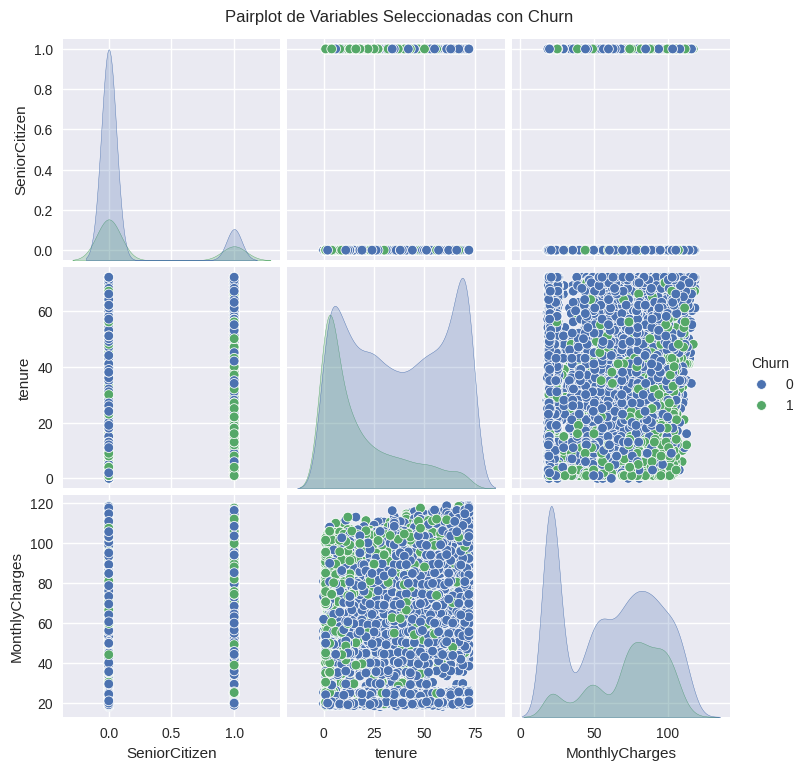

In [182]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Re-definir columnas_seleccionadas
columnas_seleccionadas = [
    'SeniorCitizen',
    'tenure',
    'MonthlyCharges',
    'InternetService',
    'TechSupport',
    'Contract',
    'PaymentMethod',
    'Churn'
]

# Crear df_seleccionado
df_seleccionado = df_depurado[columnas_seleccionadas].copy()

# Convertir la columna 'Churn' a numérico para pairplot si es necesario
df_seleccionado['Churn'] = df_seleccionado['Churn'].map({'Yes': 1, 'No': 0})

# sns.pairplot(corr_seleccionada) # Esto no es apropiado para una matriz de correlación
# sns.pairplot es para visualizar relaciones entre columnas de un DataFrame de datos
sns.pairplot(df_seleccionado, hue='Churn')
plt.suptitle('Pairplot de Variables Seleccionadas con Churn', y=1.02) # Ajusta el título para evitar que se superponga
plt.show()

Analisis de esta gráfica:

1. En la Diagonal (Distribuciones Individuales por 'Churn'):

- tenure (Antigüedad): Observarás que los clientes que no cancelan (azul) tienden a tener una distribución sesgada hacia una tenure más alta, con muchos clientes de larga duración. Por el contrario, los clientes que sí cancelan (rojo) se concentran mucho más en valores bajos de tenure, lo que refuerza la idea de que el churn es más frecuente en clientes nuevos.
- MonthlyCharges (Cargos Mensuales): Los clientes que cancelan (rojo) muestran una distribución con picos en cargos mensuales más altos, especialmente en el rango medio-alto. Esto sugiere que los clientes con facturas mensuales más elevadas son más propensos a irse.
- SeniorCitizen (Adulto Mayor): Como es una variable binaria (0/1), verás que la proporción de 'Adultos Mayores' es mayor entre los que cancelan (rojo), lo que indica una mayor vulnerabilidad al churn en este segmento.

2. Fuera de la Diagonal (Relaciones entre Pares de Variables por 'Churn'):

- tenure vs MonthlyCharges: Aquí es donde se ve una de las relaciones más interesantes. Los puntos rojos (clientes que cancelan) tienden a concentrarse en la parte inferior izquierda (clientes nuevos con cargos bajos) y superior izquierda (clientes nuevos con cargos altos). Es decir, muchos clientes que cancelan tienen poca tenure, independientemente de sus MonthlyCharges.
Los clientes con mucha tenure (hacia la derecha en el eje X de tenure) son predominantemente azules (no cancelan).
- Variables Categóricas (InternetService, TechSupport, Contract, PaymentMethod) vs Numéricas (tenure, MonthlyCharges):
Puedes ver, por ejemplo, que para InternetService='Fiber optic', la concentración de puntos rojos es mayor, especialmente con MonthlyCharges más altos y tenure baja.
De manera similar, los contratos 'Month-to-month' (Contract en el eje Y) mostrarán una mayor densidad de puntos rojos y distribuciones de tenure más cortas en comparación con 'Two year' contracts.
Los PaymentMethod como 'Electronic check' también estarán asociados a una mayor presencia de puntos rojos.

En resumen, este pairplot nos permite confirmar visualmente muchos de los hallazgos de nuestro Análisis Exploratorio de Datos (EDA):

- La antigüedad (tenure) es un factor crítico: los clientes nuevos tienen un alto riesgo de churn.
- Los MonthlyCharges altos están asociados con la cancelación.
- Las variables categóricas como InternetService (especialmente fibra óptica), Contract (mes a mes) y PaymentMethod (cheque electrónico) son claras influencias en la tasa de churn.

Esta visualización integral ayuda a entender no solo las distribuciones de las variables, sino también cómo interactúan entre sí en relación con la decisión del cliente de cancelar el servicio.

In [183]:
# importando los paquetes - bibliotecas para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/tmp/ipython-input-2987943264.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




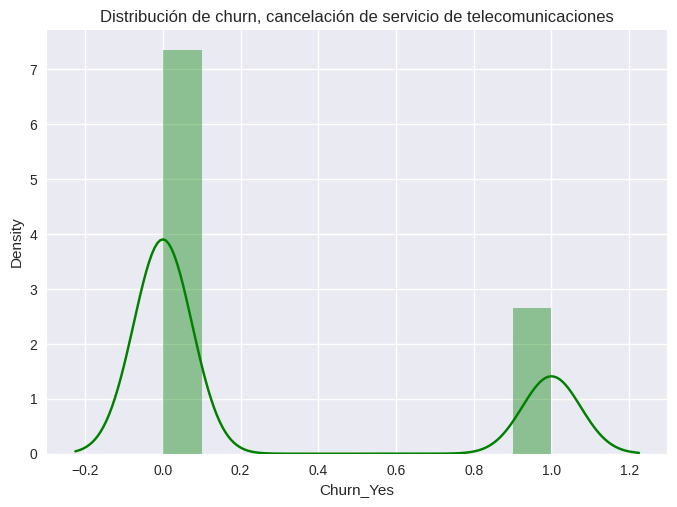

In [184]:
#Quién es nuestra variable de respuesta? Churn = Yes
sns.distplot(df_encoded['Churn_Yes'],kde=True,color='green')
plt.title('Distribución de churn, cancelación de servicio de telecomunicaciones')
plt.show()

El histograma confirma visualmente que el conjunto de datos está desbalanceado en cuanto a la variable objetivo Churn_Yes. La clase mayoritaria son los clientes que no cancelaron, y la clase minoritaria son los clientes que sí cancelaron.

Este desbalance es importante porque puede afectar el rendimiento de algunos modelos de clasificación, haciendo que tiendan a predecir la clase mayoritaria con más frecuencia. Por eso, pasos posteriores como el uso de técnicas de balanceo (SMOTE o Undersampling) son necesarios para entrenar modelos que puedan identificar mejor la clase minoritaria (los clientes que cancelan), que es la que nos interesa predecir para la estrategia de retención.

En resumen, el histograma sirve como una confirmación visual clara del desbalance en tu variable objetivo.

##Análisis de variables numéricas

Para las variables numéricas se analizó su relación con la variable objetivo (Churn) mediante estadísticos descriptivos y análisis de correlación.
El objetivo fue identificar variables con mayor poder explicativo y detectar posibles problemas de multicolinealidad.

Las variables evaluadas fueron:

- tenure
- MonthlyCharges
- SeniorCitizen
- TotalCharges (evaluada como variable opcional)

El análisis mostró:

- Una relación inversa significativa entre tenure y Churn, indicando que clientes con mayor antigüedad tienden a cancelar menos.

- Una relación positiva entre MonthlyCharges y Churn, donde cargos más altos se asocian a mayor probabilidad de cancelación.

- SeniorCitizen presenta una relación moderada con churn.

- Se detectó alta correlación entre tenure y TotalCharges, por lo que se decidió utilizar únicamente tenure en el modelo base para evitar multicolinealidad.

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')


In [186]:
df_corr = df[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges', 'Churn']].copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})


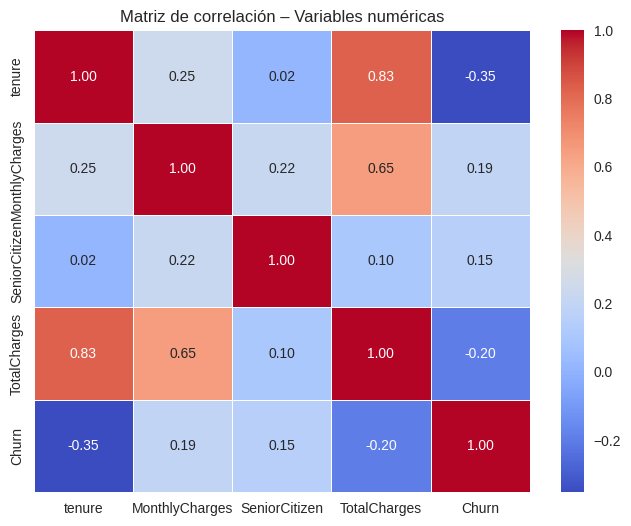

In [187]:
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Matriz de correlación – Variables numéricas")
plt.show()


📌 Esto justifica:

*tenure* ↓ churn

*MonthlyCharges* ↑ churn

*correlación* tenure vs TotalCharges

##Análisis de variables categóricas

Se evaluaron mediante tasas de churn por categoría y gráficos comparativos, permitiendo una interpretación clara del comportamiento de los clientes.

Las variables categóricas analizadas fueron:

- Contract
- InternetService
- PaymentMethod
- TechSupport

Los principales hallazgos fueron:

- Los clientes con contrato month-to-month presentan una tasa de churn significativamente mayor.

- Los usuarios de servicio de fibra óptica muestran mayor propensión a cancelar en comparación con otros tipos de servicio.

- El método de pago Electronic check está asociado a mayores tasas de churn.

- Los clientes que cuentan con TechSupport activo presentan menor tasa de cancelación.

Estas variables fueron seleccionadas para el modelo debido a su clara relación con el churn y su relevancia desde el punto de vista del negocio.

In [188]:
def plot_churn_rate(df, column):
    churn_rate = (
        df.groupby(column)['Churn']
        .value_counts(normalize=True)
        .rename('rate')
        .reset_index()
    )

    churn_rate = churn_rate[churn_rate['Churn'] == 'Yes']

    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=churn_rate,
        x=column,
        y='rate',
        palette='Blues_d'
    )
    plt.title(f"Tasa de churn por {column}")
    plt.ylabel("Proporción de churn")
    plt.xlabel(column)
    plt.ylim(0, churn_rate['rate'].max() + 0.05)
    plt.xticks(rotation=30)
    plt.show()


- Contract : 📌 Insight esperado:

Month-to-month con mayor churn

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




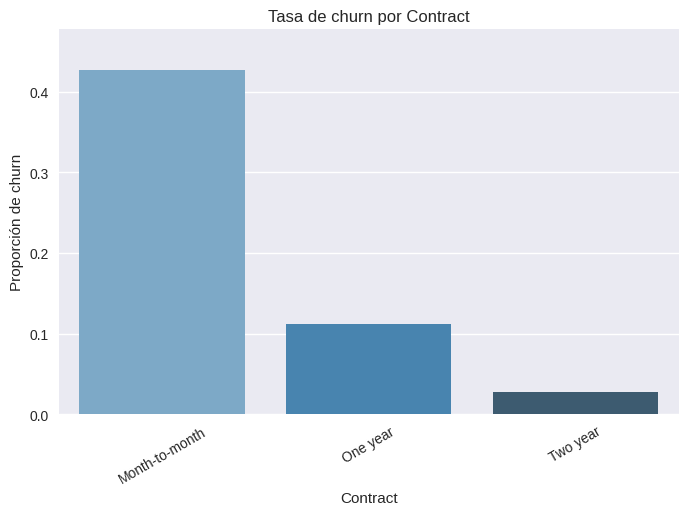

In [189]:
plot_churn_rate(df, 'Contract')

- InternetService: 📌 Insight esperado

Fiber optic con mayor churn

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




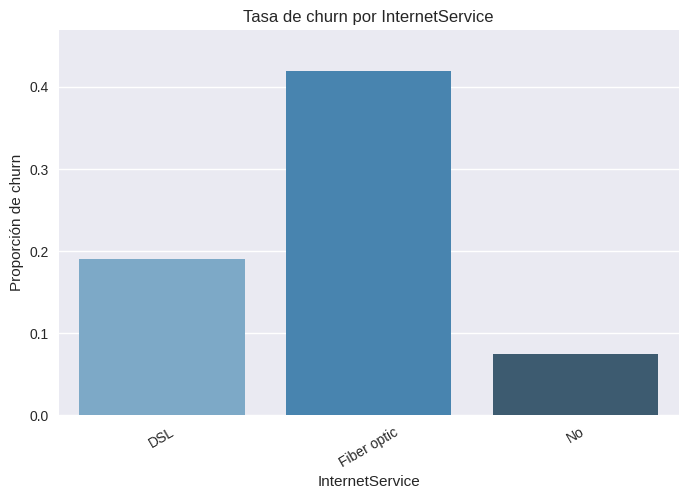

In [190]:
plot_churn_rate(df, 'InternetService')

- PaymentMethod: 📌 Insight esperado:

Electronic check asociado a mayor churn

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




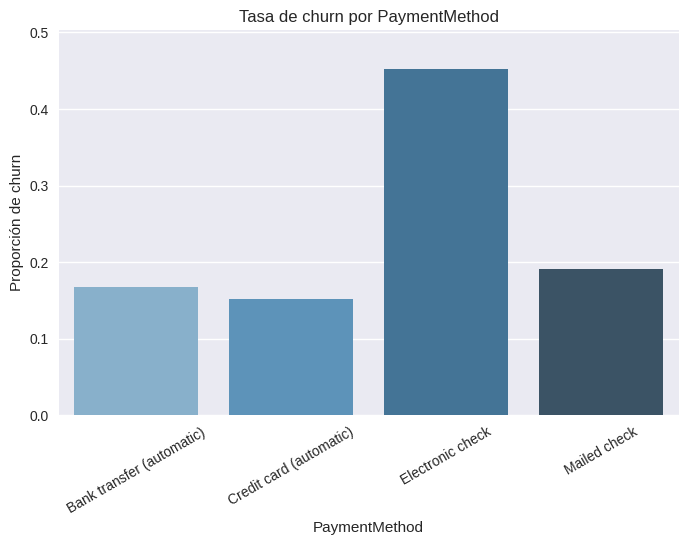

In [191]:
plot_churn_rate(df, 'PaymentMethod')

- TechSupport: 📌 Insight esperado:

Menor churn cuando el soporte está activo

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




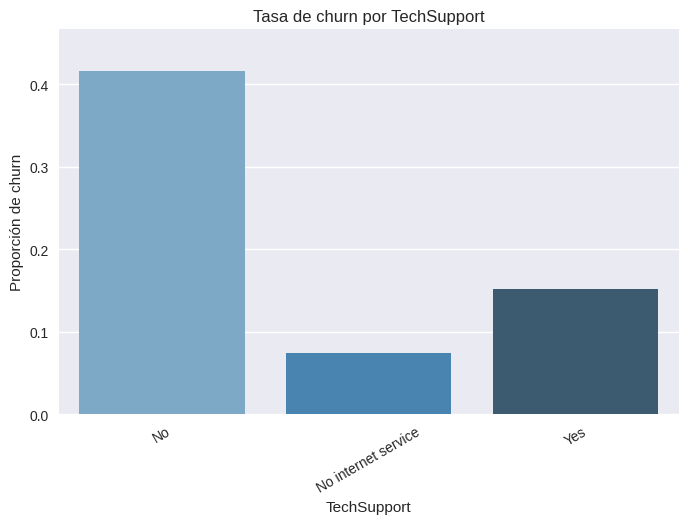

In [192]:
plot_churn_rate(df, 'TechSupport')

##Variables descartadas y opcionales

Algunas variables fueron descartadas o consideradas opcionales debido a su bajo impacto en la predicción o a relaciones débiles con la variable objetivo.

Variables descartadas:

- StreamingTV
- StreamingMovies
- gender
- customerID

“No se observa relación significativa con churn.”

Variables opcionales para futuras iteraciones:

- OnlineSecurity
- Partner
- Dependents
- TotalCharges

Estas variables podrán evaluarse en iteraciones posteriores del modelo para analizar posibles mejoras en el desempeño.

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




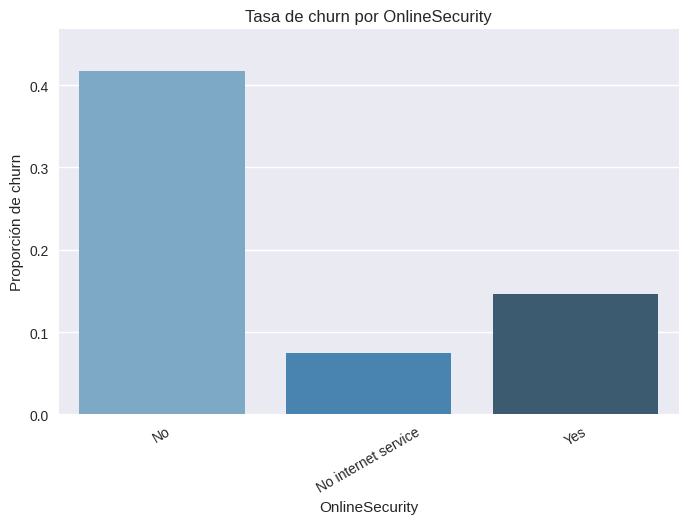

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




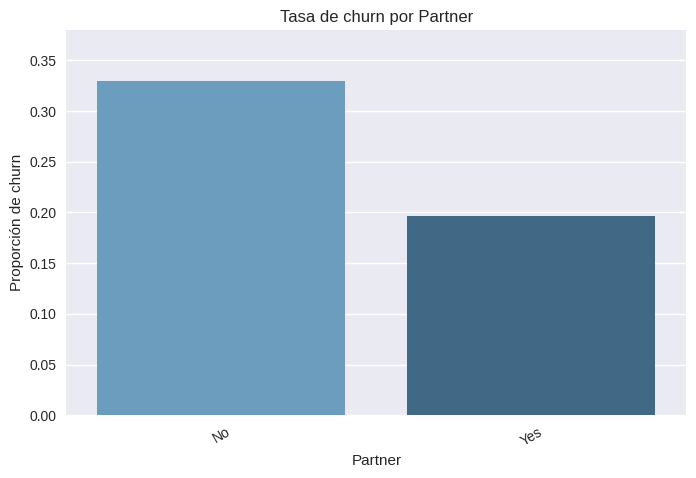

/tmp/ipython-input-2055795139.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




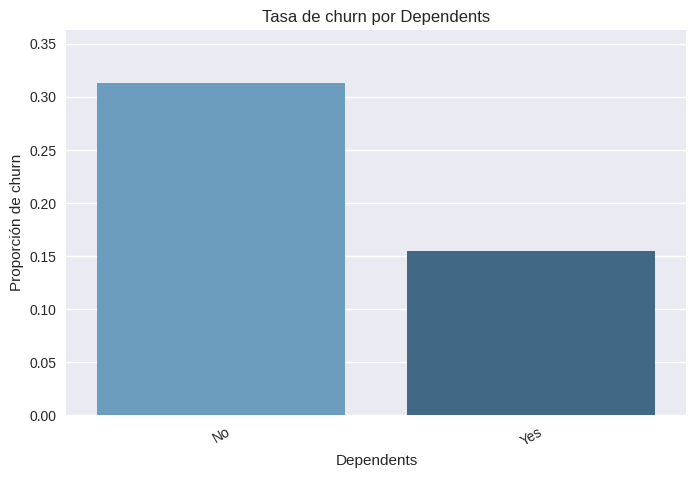

In [193]:
plot_churn_rate(df, 'OnlineSecurity')
plot_churn_rate(df, 'Partner')
plot_churn_rate(df, 'Dependents')

El análisis exploratorio permitió identificar las variables con mayor relación con churn.
Las variables numéricas se evaluaron mediante correlación, mientras que las categóricas
se analizaron a través de tasas de churn por categoría.
Con base en estos resultados, se seleccionaron únicamente las variables con mayor
impacto para el modelo base.

##Selección final de variables

Con base en el análisis exploratorio, se definió un conjunto final de variables para el modelo base, priorizando simplicidad, interpretabilidad y reducción de ruido.

Las transformaciones necesarias para estas variables se implementan posteriormente en la etapa de Feature Engineering.

##🧠 Resumen EDA
🔥 Principales drivers de churn

1️⃣ Contract (Month-to-month)

2️⃣ Electronic check

3️⃣ No TechSupport / No OnlineSecurity

4️⃣ SeniorCitizen

5️⃣ Tenure bajo (< 12 meses)

6️⃣ MonthlyCharges altos

🎯 Segmento de mayor riesgo

Clientes nuevos, con contrato mensual,
factura alta, sin soporte ni seguridad,
que pagan con electronic check.

💡 Acciones de negocio sugeridas

Migrar clientes mensuales a contratos anuales

Bundles con TechSupport + OnlineSecurity

Incentivos en los primeros 3–6 meses

Programas específicos para seniors

Eliminar fricción en pagos

## Conclusiones del EDA

- Los clientes con contratos mes a mes presentan mayor tasa de cancelación.
- Un mayor tiempo de permanencia reduce significativamente el churn.
- Cargos mensuales elevados están asociados a mayor probabilidad de cancelación.
- Servicios adicionales como soporte técnico parecen reducir el churn.

## Selección final de variables para el modelo

| Variable | Tipo | Se usa en el modelo | Justificación |
|--------|------|---------------------|---------------|
| tenure | Numérica | ✅ Sí | Alta relación inversa con churn |
| MonthlyCharges | Numérica | ✅ Sí | Cargos altos aumentan churn |
| SeniorCitizen | Numérica | ✅ Sí |
| Contract | Categórica | ✅ Sí | Contrato mes a mes presenta mayor churn |
| InternetService | Categórica | ✅ Sí | Fibra óptica muestra mayor cancelación |
| PaymentMethod | Categórica | ✅ Sí | Cheque electrónico asociado a churn |
| TechSupport | Categórica | ✅ Sí | Reduce churn cuando está activo |
| OnlineSecurity | Categórica | ⚠️ Opcional | Puede mejorar señal de retención |
| StreamingTV | Categórica | ❌ No | Bajo impacto en churn |
| StreamingMovies | Categórica | ❌ No | Bajo impacto en churn |
| gender | Categórica | ❌ No | No muestra relación significativa |
| TotalCharges | Numérica | ⚠️ Opcional| Resume relación cliente–empresa |
| Partner | Categórica | ⚠️ Opcional | Relación leve |
| Dependents | Categórica | ⚠️ Opcional | Relación leve |
| customerID | ID | ❌ No | Identificador, sin valor predictivo |

A partir del análisis exploratorio, se seleccionaron variables con impacto claro en la cancelación de clientes.
La priorización se realizó considerando relación con churn, interpretabilidad y simplicidad del modelo,
buscando un balance entre desempeño y claridad para el negocio.

** #🎯 Resultado FINAL del EDA**

Después de analizar distribuciones, relaciones con Churn y coherencia de negocio, el EDA concluye lo siguiente:

🧠 Variables seleccionadas como principales para el modelo
📊 Cuadro resumen post-EDA (VARIABLES DE PESO)

## Variables finales seleccionadas tras el EDA

| Variable | Tipo | Decisión | Justificación basada en EDA |
|--------|------|----------|-----------------------------|
| tenure | Numérica | ✅ Usar | Relación inversa fuerte con churn. Clientes con menor antigüedad cancelan más. |
| MonthlyCharges | Numérica | ✅ Usar | Cargos mensuales altos se asocian a mayor probabilidad de churn. |
| SeniorCitizen | Numérica | ✅ Sí |
| Contract | Categórica | ✅ Usar | Contratos mes a mes presentan la mayor tasa de cancelación. |
| InternetService | Categórica | ✅ Usar | Clientes con fibra óptica muestran mayor churn. |
| PaymentMethod | Categórica | ✅ Usar | El pago por cheque electrónico se asocia a mayor churn. |
| TechSupport | Categórica | ✅ Usar | Contar con soporte técnico reduce significativamente la cancelación. |


🟡 Variables secundarias (opcionales)

Estas no son malas, pero su impacto es menor o redundante.

| Variable | Decisión | Motivo |
|--------|----------|--------|
| OnlineSecurity | ⚠️ Opcional | Puede aportar señal de retención, impacto moderado. |
| Partner | ⚠️ Opcional | Relación leve con churn. |
| Dependents | ⚠️ Opcional | Impacto bajo en comparación con otras variables. |
| TotalCharges | ⚠️ Opcional| Resume relación cliente–empresa |



A partir del análisis exploratorio, se seleccionaron variables con impacto claro en la cancelación de clientes.
La priorización se realizó considerando relación con churn, interpretabilidad y simplicidad del modelo,
buscando un balance entre desempeño y claridad para el negocio.

❌ Variables descartadas tras el EDA

| Variable | Motivo de exclusión |
|--------|---------------------|
| customerID | Identificador único, sin valor predictivo. |
| gender | No muestra relación significativa con churn. |
| StreamingTV | Bajo impacto en churn. |
| StreamingMovies | Bajo impacto en churn. |
| PhoneService | No aporta señal relevante. |
| MultipleLines | Impacto marginal. |


🧠 Conclusión FINAL del EDA

## Conclusión del EDA

El análisis exploratorio permitió identificar un conjunto reducido de variables con impacto claro en la cancelación de clientes.
Se priorizaron variables relacionadas con el tipo de contrato, antigüedad, cargos y servicios críticos,
buscando un equilibrio entre poder predictivo, interpretabilidad y simplicidad del modelo,
en línea con el objetivo de construir un MVP funcional para el hackathon.


“El EDA nos permitió pasar de datos crudos a una selección clara de variables con impacto real en churn.”

# C. Features Engineering


## ⛳ Normalización / Estandarización

| Tipo de variable | Ejemplo         | Qué hacer        |
| ---------------- | --------------- | ---------------- |
| Binaria          | Yes / No        | `map → 1 / 0`    |
| Categórica 3+    | Contract        | One-Hot Encoding |
| Numérica         | tenure, charges | StandardScaler  |


En este proyecto, aplicaremos la normalización Min-Max, que transforma los valores al rango [0, 1]. Esto ayuda a garantizar que todas las variables numéricas contribuyan de forma equilibrada al modelo de Regresión Logística que utilizaremos. Aunque Random Forest no lo requiere, normalizamos los datos para mantener la consistencia en la preparación de los conjuntos de entrenamiento y prueba.

In [194]:
df_depurado.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [195]:
# Validar proporción en la columna Cancelacion_1 = Churn_yes
df_depurado['Churn'].value_counts(normalize = True)

# Se observa que clientes tienen una proporcion 73% Activos  y 26% Inactivos, No es adecuado porque debe haber una relación minima de 40% en uno de los dos valores, si se deja asi, se inclina la balanza a los registros True.
# Se observa proporción Inadecuada


,proportion
Churn,
No,0.73463
Yes,0.26537




####🚧Variables Categoricas - One-hot encoding

🔤 Variables categóricas

Estas van codificadas (One-Hot Encoding):

- Contract
- InternetService
- PaymentMethod

👉 Transformación:

OneHotEncoder(handle_unknown="ignore")

In [196]:
categorical_features = [
    'Contract',
    'PaymentMethod',
    'InternetService',
    'TechSupport' # Movemos TechSupport aquí para que OneHotEncoder lo maneje
]

####🚧Variables Numercias - aplicar StandardScaler

🎯 Variables finales

🔢 Variables numéricas

Estas van escaladas:

- tenure
- MonthlyCharges
- TotalCharges

👉 Transformación:

StandardScaler

In [197]:
numeric_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

####🚧Variables Binary - passthrough

🔢 Variables binarias (Yes/No o 0/1)

Estas van escaladas:

SeniorCitizen # ya es 0 / 1
TechSupport

👉 Transformación:

StandardScaler

In [198]:
binary_features = [
    'SeniorCitizen' # SeniorCitizen ya es 0/1 numérico, así que puede quedarse en passthrough
]

##Definimos las transformaciones

In [199]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), # variables numericas se aplica StandardScaler
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features), # variables categoricas se aplica OneHotEncoder
        ('bin', 'passthrough', binary_features) # variables bianrias se aplica passthrough
    ]
)

##Definir X e y desde df_depurado

In [200]:
X = df_depurado[
    numeric_features +
    binary_features +
    categorical_features
]

y = df_depurado['Churn'].map({'Yes': 1, 'No': 0})


##Split de entrenamiento y prueba

In [201]:
# Scikit-learn (sklearn) es una biblioteca de código abierto para Python fundamental en el aprendizaje automático (Machine Learning)
from sklearn.model_selection import train_test_split

#Usamos una división 80/20 con estratificación para preservar la proporción de churn y asegurar una evaluación confiable del modelo.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42, #semilla aleatoria para reproducibilidad
    stratify=y
)

In [202]:
print(f"Con esta separación, se obtiene:\n")
print(f"df_encoded = {df_encoded.shape[0]} registros X {df_encoded.shape[1]} Columnas")
print(f"\n|   80 % Train - Train          |   20 % Prueba - Teste     |")
print(f"|----------------------------   |---------------------------|")
print(f"| - X_train  ({X_train.shape[0]} x {X_train.shape[1]} col)    | - X_test ({X_test.shape[0]} X {X_test.shape[1]} col)  |")
print(f"| - y_train  ({y_train.shape[0]})             | - y_test = ({y_test.shape[0]})         |")

Con esta separación, se obtiene:

df_encoded = 7043 registros X 25 Columnas

|   80 % Train - Train          |   20 % Prueba - Teste     |
|----------------------------   |---------------------------|
| - X_train  (5634 x 8 col)    | - X_test (1409 X 8 col)  |
| - y_train  (5634)             | - y_test = (1409)         |


#D. Modelo

## 1.**Sin Balanceo**

### Logistic Regression.

#### Importar `LogisticRegression` para preparar definicion y entrenamiento del pipeline.



In [203]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#### Actualizar el pipeline para usar el  `LogisticRegression` y luego entrenar este nuevo pipeline con los datos de entrenamiento.





In [204]:
# Definimos el pipeline que incluye el preprocesador y el clasificador
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(random_state=42)) # Añadimos LogisticRegression
])
print("Logistic Regression pipeline defined.")

Logistic Regression pipeline defined.


In [205]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'TechSupport']),
                                                 ('bin', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [206]:
print("Logistic Regression pipeline trained successfully.")

Logistic Regression pipeline trained successfully.


#### Evaluar el modelo `LogisticRegression` generando y mostrando la matriz de confusión, el informe de clasificación y la precisión.



In [207]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 0.79

AUC: 0.71



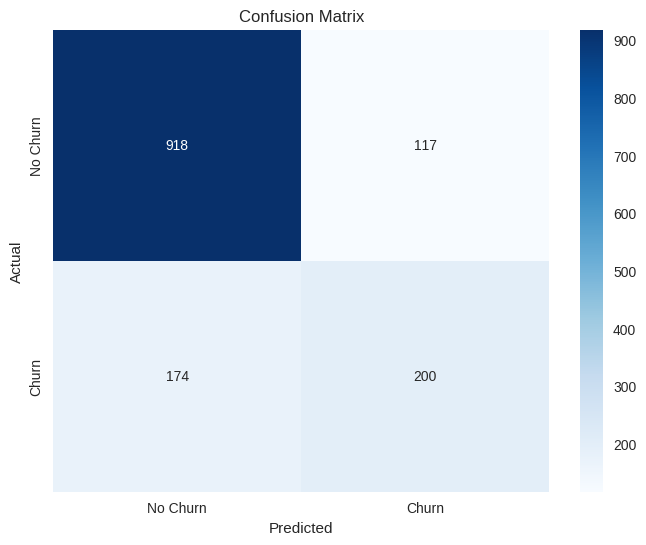


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.86      1035
       Churn       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [208]:

y_pred = pipeline.predict(X_test)

# Calcular Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Calcular AUC
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc_score:.2f}\n")

# Generar Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

### Random Forest.

#### Importar `Random Forest` para preparar definicion y entrenamiento del pipeline.



In [209]:
from sklearn.ensemble import RandomForestClassifier
print("RandomForestClassifier imported successfully.")

RandomForestClassifier imported successfully.


#### Actualizar el pipeline para usar el  `Random Forest` y luego entrenar este nuevo pipeline con los datos de entrenamiento.



In [210]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)) # Replaced LogisticRegression with RandomForestClassifier
])
print("Pipeline updated with RandomForestClassifier.")

Pipeline updated with RandomForestClassifier.


In [211]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'TechSupport']),
                                                 ('bin', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#### Evaluar el modelo Random Forest generando y mostrando la matriz de confusión, el informe de clasificación y la precisión.



Random Forest Accuracy: 0.77

AUC: 0.67



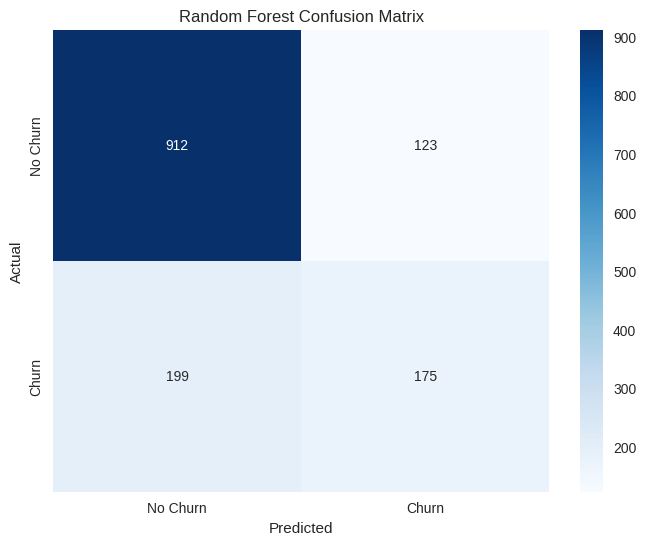


Random Forest Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.88      0.85      1035
       Churn       0.59      0.47      0.52       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rf = pipeline.predict(X_test)

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}\n")

# Calcular AUC
auc_score = roc_auc_score(y_test, y_pred_rf)
print(f"AUC: {auc_score:.2f}\n")

# Generate Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

### Gradient Boosting.

#### Importar `GradientBoostingClassifier` para preparar definicion y entrenamiento del pipeline.



In [213]:
from sklearn.ensemble import GradientBoostingClassifier
print("GradientBoostingClassifier imported successfully.")

GradientBoostingClassifier imported successfully.


#### Actualizar el pipeline para usar el  `GradientBoostingClassifier` y luego entrenar este nuevo pipeline con los datos de entrenamiento.



In [214]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42)) # Replaced RandomForestClassifier with GradientBoostingClassifier
])
print("Pipeline updated with GradientBoostingClassifier.")
pipeline.fit(X_train, y_train)
print("Gradient Boosting pipeline trained successfully.")

Pipeline updated with GradientBoostingClassifier.
Gradient Boosting pipeline trained successfully.


In [215]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'TechSupport']),
                                                 ('bin', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

#### Evaluar el modelo Gradient Boosting generando y mostrando la matriz de confusión, el informe de clasificación y la precisión.



In [216]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

Gradient Boosting Accuracy: 0.80

AUC: 0.71



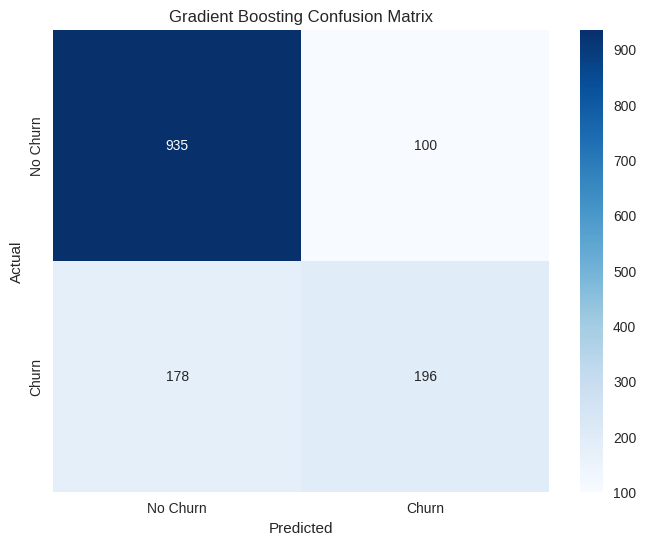


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.52      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [217]:
# Make predictions using the trained Gradient Boosting pipeline
y_pred_gb = pipeline.predict(X_test)

# Calculate Accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}\n")

# Calcular AUC
auc_score = roc_auc_score(y_test, y_pred_gb)
print(f"AUC: {auc_score:.2f}\n")

# Generate Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['No Churn', 'Churn']))

### XGBoost


#### Importar `XGBClassifier` para preparar definicion y entrenamiento del pipeline.



In [218]:
from xgboost import XGBClassifier
print("XGBClassifier imported successfully.")

XGBClassifier imported successfully.


#### Actualizar el pipeline para usar el  `XGBClassifier` y luego entrenar este nuevo pipeline con los datos de entrenamiento.



In [219]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])
print("Pipeline updated with XGBClassifier.")
pipeline.fit(X_train, y_train)
print("XGBoost pipeline trained successfully.")

Pipeline updated with XGBClassifier.
XGBoost pipeline trained successfully.


In [220]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'TechSupport']),
                                                 ('bin', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=N...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

#### Evaluar el modelo XGBoost generando y mostrando la matriz de confusión, el informe de clasificación y la precisión.



XGBoost Accuracy: 0.79

AUC: 0.70



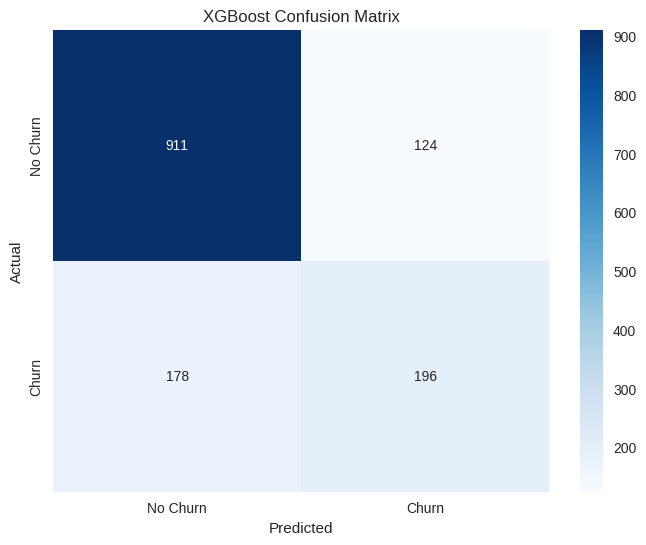


XGBoost Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.88      0.86      1035
       Churn       0.61      0.52      0.56       374

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [221]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the trained XGBoost pipeline
y_pred_xgb = pipeline.predict(X_test)

# Calculate Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}\n")

# Calcular AUC
auc_score = roc_auc_score(y_test, y_pred_xgb)
print(f"AUC: {auc_score:.2f}\n")

# Generate Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Churn', 'Churn']))

### LightGBM

#### Importar `LGBMClassifier` para preparar definicion y entrenamiento del pipeline.



In [222]:
from lightgbm import LGBMClassifier
print("LGBMClassifier imported successfully.")

LGBMClassifier imported successfully.


#### Actualizar el pipeline para usar el  `LGBMClassifier` y luego entrenar este nuevo pipeline con los datos de entrenamiento.



In [223]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LGBMClassifier(random_state=42)) # Replaced XGBClassifier with LGBMClassifier
])
print("Pipeline updated with LGBMClassifier.")
pipeline.fit(X_train, y_train)
print("LightGBM pipeline trained successfully.")

Pipeline updated with LGBMClassifier.
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
LightGBM pipeline trained successfully.


In [224]:
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'TechSupport']),
                                                 ('bin', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', LGBMClassifier(random_state=42))])

#### Evaluar el modelo LightGMB generando y mostrando la matriz de confusión, el informe de clasificación y la precisión.



LightGBM Accuracy: 0.80

AUC: 0.72



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



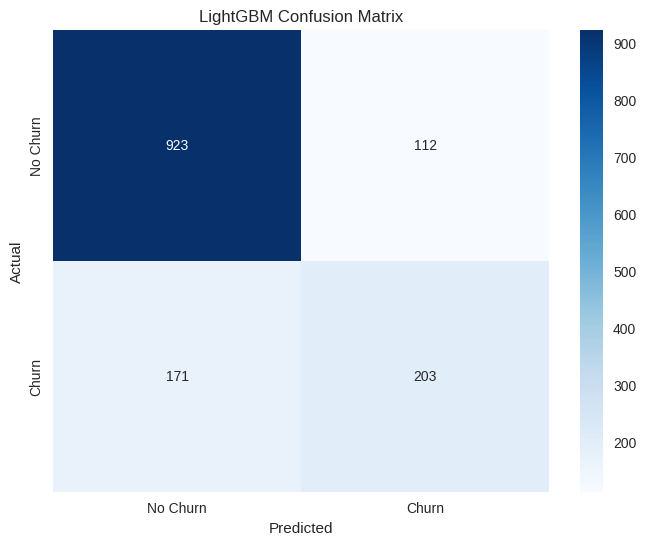


LightGBM Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87      1035
       Churn       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [225]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the trained LightGBM pipeline
y_pred_lgbm = pipeline.predict(X_test)

# Calculate Accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.2f}\n")

# Calcular AUC
auc_score = roc_auc_score(y_test, y_pred_lgbm)
print(f"AUC: {auc_score:.2f}\n")

# Generate Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm, target_names=['No Churn', 'Churn']))

### CatBoost

#### Instalación catboost



In [226]:
import sys
!{sys.executable} -m pip install catboost
print("CatBoost installed successfully.")

CatBoost installed successfully.


#### Importar `CatBoostClassifier` para preparar definición y entrenamiento del pipeline.



In [227]:
from catboost import CatBoostClassifier
print("CatBoostClassifier imported successfully.")

CatBoostClassifier imported successfully.


#### Actualizar el pipeline para usar el  `CatBoostClassifier` y luego entrenar este nuevo pipeline con los datos de entrenamiento.



In [228]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0)) # Replaced LGBMClassifier with CatBoostClassifier
])
print("Pipeline updated with CatBoostClassifier.")
pipeline.fit(X_train, y_train)
print("CatBoost pipeline trained successfully.")

Pipeline updated with CatBoostClassifier.
CatBoost pipeline trained successfully.


In [229]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'TechSupport']),
                                                 ('bin', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x794d0d304740>)])

#### Evaluar el modelo CatBoostClassifier generando y mostrando la matriz de confusión, el informe de clasificación y la precisión.



CatBoost Accuracy: 0.80

AUC: 0.71



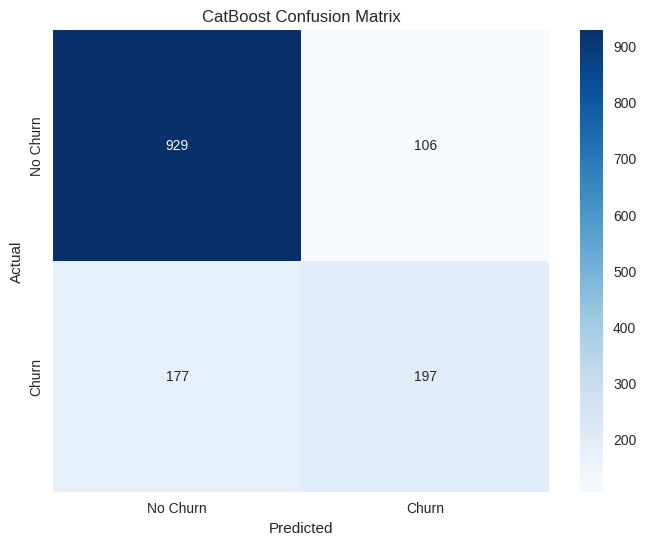


CatBoost Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [230]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the trained CatBoost pipeline
y_pred_catboost = pipeline.predict(X_test)

# Calculate Accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost:.2f}\n")

# Calcular AUC
auc_score = roc_auc_score(y_test, y_pred_catboost)
print(f"AUC: {auc_score:.2f}\n")

# Generate Confusion Matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
print("\nCatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost, target_names=['No Churn', 'Churn']))

### KNN

#### Importar `KNeighborsClassifier` para preparar definicion y entrenamiento del pipeline.



In [231]:
#instanciar el modelo
from sklearn.neighbors import KNeighborsClassifier
print("KNeighborsClassifier imported successfully.")

KNeighborsClassifier imported successfully.


#### Actualizar el pipeline para usar el  `LGBMClassifier` y luego entrenar este nuevo pipeline con los datos de entrenamiento.



In [232]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier()) # Removed random_state=42
])
print("Pipeline updated with KNeighborsClassifier.")
pipeline.fit(X_train, y_train)
print("KNN pipeline trained successfully.")

Pipeline updated with KNeighborsClassifier.
KNN pipeline trained successfully.


In [233]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'TechSupport']),
                                                 ('bin', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', KNeighborsClassifier())])

#### Evaluar el modelo KNN generando y mostrando la matriz de confusión, el informe de clasificación y la precisión.



KNN Accuracy: 0.76

AUC: 0.6767948022423725


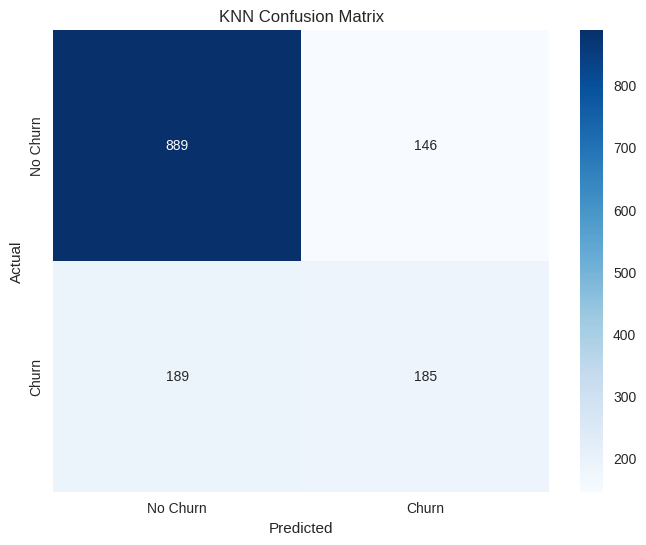


KNN Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.86      0.84      1035
       Churn       0.56      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [234]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the trained KNeighborsClassifier pipeline
y_pred_knn = pipeline.predict(X_test)

# Calculate Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}\n")
print("AUC:", roc_auc_score(y_test, y_pred_knn))

# Generate Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
print("\nKNN Classification Report:") # Fixed the escape sequence warning
print(classification_report(y_test, y_pred_knn, target_names=['No Churn', 'Churn']))

### Resumen del Rendimiento de Modelos

In [235]:
metrics = {}

# 2. For the Logistic Regression model:
metrics['Regresión Logística'] = {
    'Accuracy': 0.79,
    'AUC': 0.71,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.89,
    'F1-Score (No Churn)': 0.86,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.63,
    'Recall (Churn)': 0.53,
    'F1-Score (Churn)': 0.58,
    'Support (Churn)': 374
}

# 3. For the Random Forest model:
metrics['Random Forest'] = {
    'Accuracy': 0.77,
    'AUC': 0.67,
    'Precision (No Churn)': 0.82,
    'Recall (No Churn)': 0.88,
    'F1-Score (No Churn)': 0.85,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.59,
    'Recall (Churn)': 0.47,
    'F1-Score (Churn)': 0.52,
    'Support (Churn)': 374
}

# 4. For the Gradient Boosting model:
metrics['Gradient Boosting'] = {
    'Accuracy': 0.80,
    'AUC': 0.71,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.90,
    'F1-Score (No Churn)': 0.87,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.66,
    'Recall (Churn)': 0.52,
    'F1-Score (Churn)': 0.59,
    'Support (Churn)': 374
}

# 5. For the XGBoost model:
metrics['XGBoost'] = {
    'Accuracy': 0.79,
    'AUC': 0.70,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.88,
    'F1-Score (No Churn)': 0.86,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.61,
    'Recall (Churn)': 0.52,
    'F1-Score (Churn)': 0.56,
    'Support (Churn)': 374
}

# 6. For the LightGBM model:
metrics['LightGBM'] = {
    'Accuracy': 0.80,
    'AUC': 0.72,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.89,
    'F1-Score (No Churn)': 0.87,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.64,
    'Recall (Churn)': 0.54,
    'F1-Score (Churn)': 0.59,
    'Support (Churn)': 374
}

# 7. For the CatBoost model:
metrics['CatBoost'] = {
    'Accuracy': 0.80,
    'AUC': 0.71,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.90,
    'F1-Score (No Churn)': 0.87,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.65,
    'Recall (Churn)': 0.53,
    'F1-Score (Churn)': 0.58,
    'Support (Churn)': 374
}

# 8. For the KNN model:
metrics['KNN'] = {
    'Accuracy': 0.76,
    'AUC': 0.68,
    'Precision (No Churn)': 0.82,
    'Recall (No Churn)': 0.86,
    'F1-Score (No Churn)': 0.84,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.56,
    'Recall (Churn)': 0.49,
    'F1-Score (Churn)': 0.52,
    'Support (Churn)': 374
}

print("All metrics for models without SMOTE collected.")

All metrics for models without SMOTE collected.


In [236]:
import pandas as pd

df_metrics = pd.DataFrame.from_dict(metrics, orient='index')
df_metrics_transposed = df_metrics.T

print("DataFrame de métricas sin SMOTE (transpuesto) creado exitosamente.")
display(df_metrics_transposed)
# Display as Markdown table with rounded values for smaller font
#print("## Cuadro Comparativo Detallado de Métricas por Modelo (sin SMOTE)\n")
#print(df_metrics_without_smote_transposed.round(2).to_markdown(index=True))

DataFrame de métricas sin SMOTE (transpuesto) creado exitosamente.


,Regresión Logística,Random Forest,Gradient Boosting,XGBoost,LightGBM,CatBoost,KNN
Accuracy,0.79,0.77,0.80,0.79,0.80,0.80,0.76
AUC,0.71,0.67,0.71,0.70,0.72,0.71,0.68
Precision (No Churn),0.84,0.82,0.84,0.84,0.84,0.84,0.82
Recall (No Churn),0.89,0.88,0.90,0.88,0.89,0.90,0.86
F1-Score (No Churn),0.86,0.85,0.87,0.86,0.87,0.87,0.84
Support (No Churn),1035.00,1035.00,1035.00,1035.00,1035.00,1035.00,1035.00
Precision (Churn),0.63,0.59,0.66,0.61,0.64,0.65,0.56
Recall (Churn),0.53,0.47,0.52,0.52,0.54,0.53,0.49
F1-Score (Churn),0.58,0.52,0.59,0.56,0.59,0.58,0.52
Support (Churn),374.00,374.00,374.00,374.00,374.00,374.00,374.00


## Cuadro Comparativo Detallado de Métricas por Modelo (sin Balanceo)

|                       | Regresión Logística | Random Forest | Gradient Boosting | XGBoost | LightGBM | CatBoost | KNN   |
|:----------------------|:--------------------|:--------------|:------------------|:--------|:---------|:---------|:------|
| Accuracy              | 0.79                | 0.77          | 0.8               | 0.79    | 0.8      | 0.8      | 0.76  |
| AUC                   | 0.71                | 0.67          | 0.71              | 0.7     | 0.72     | 0.71     | 0.68  |
| Precision (No Churn)  | 0.84                | 0.82          | 0.84              | 0.84    | 0.84     | 0.84     | 0.82  |
| Recall (No Churn)     | 0.89                | 0.88          | 0.9               | 0.88    | 0.89     | 0.9      | 0.86  |
| F1-Score (No Churn)   | 0.86                | 0.85          | 0.87              | 0.86    | 0.87     | 0.87     | 0.84  |
| Support (No Churn)    | 1035                | 1035          | 1035              | 1035    | 1035     | 1035     | 1035  |
| Precision (Churn)     | 0.63                | 0.59          | 0.66              | 0.61    | 0.64     | 0.65     | 0.56  |
| Recall (Churn)        | 0.53                | 0.47          | 0.52              | 0.52    | 0.54     | 0.53     | 0.49  |
| F1-Score (Churn)      | 0.58                | 0.52          | 0.59              | 0.56    | 0.59     | 0.58     | 0.52  |
| Support (Churn)       | 374                 | 374           | 374               | 374     | 374      | 374      | 374   |

#### Preguntas y Respuestas
El rendimiento de los modelos evaluados muestra que, si bien la precisión general es relativamente alta (alrededor del 76% al 80%), los modelos luchan consistentemente con la predicción de la clase minoritaria 'Churn'. Gradient Boosting, LightGBM y CatBoost generalmente exhiben un rendimiento ligeramente mejor en métricas clave como AUC y F1-Score para la clase 'Churn' en comparación con otros modelos.

### Hallazgos Clave del Análisis de Datos
*   **Precisión General**: Los modelos lograron una precisión general que oscila entre 0.76 (KNN) y 0.80 (Gradient Boosting, LightGBM, CatBoost).
*   **Área Bajo la Curva (AUC)**: Los puntajes AUC variaron entre 0.67 (Random Forest) y 0.72 (LightGBM), lo que indica un poder discriminatorio moderado.
*   **Rendimiento de la Clase Churn (Clase Minoritaria)**:
    *   **Precisión (Churn)**: Osciló entre 0.56 (KNN) y 0.66 (Gradient Boosting).
    *   **Recall (Churn)**: Osciló entre 0.47 (Random Forest) y 0.54 (LightGBM).
    *   **F1-Score (Churn)**: Osciló entre 0.52 (Random Forest, KNN) y 0.59 (Gradient Boosting, LightGBM).
*   **Modelos con Mejor Rendimiento para la Predicción de Churn**: Gradient Boosting y LightGBM mostraron los F1-Scores más altos para la clase 'Churn' (0.59), seguidos de cerca por CatBoost (0.58), lo que sugiere que estos modelos son ligeramente mejores para equilibrar la precisión y el recall para la clase minoritaria sin sobremuestreo.
*   **Modelos con Bajo Rendimiento para la Predicción de Churn**: Random Forest y KNN tuvieron los F1-Scores más bajos para la clase 'Churn' (0.52), lo que indica una mayor dificultad para identificar a los clientes 'Churn'.
*   **Rendimiento de la Clase No Churn (Clase Mayoritaria)**: Todos los modelos tuvieron un rendimiento muy bueno en la clase 'No Churn', con F1-Scores consistentemente superiores a 0.84 y Recall superiores a 0.86, probablemente debido a su mayor soporte (1035 frente a 374 para 'Churn').

### Insights o Próximos Pasos
*   Las métricas de rendimiento consistentemente más bajas (Precision, Recall, F1-Score) para la clase 'Churn' en todos los modelos resaltan un desafío significativo para identificar correctamente a los clientes que abandonarán el servicio, probablemente debido a la naturaleza desequilibrada del conjunto de datos.
*   El siguiente paso crítico es comparar estos resultados con el rendimiento de los modelos entrenados con SMOTE para determinar si abordar el desequilibrio de clases mejora la detección de clientes 'Churn', especialmente en términos de Recall y F1-Score para la clase minoritaria.

## 2.**SMOTE Balancear entrenamiento**

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.

El **Balanceo de Clases** es una técnica crucial en Machine Learning, especialmente cuando se trabaja con conjuntos de datos donde una clase (minoritaria) tiene significativamente menos ejemplos que la otra (mayoritaria). En nuestro caso, la clase 'Churn' (clientes que cancelan) es la minoritaria, representando aproximadamente el 26% del total, mientras que la clase 'No Churn' (clientes activos) es la mayoritaria (74%).

 ¿Por qué es importante balancear las clases?

1.  **Sesgo del Modelo:** Los modelos de Machine Learning, por defecto, tienden a optimizar la precisión general. Si el dataset está desbalanceado, un modelo puede lograr una alta precisión simplemente prediciendo siempre la clase mayoritaria. Por ejemplo, si el 90% de los clientes no hace churn, un modelo que siempre predice 'No Churn' tendrá un 90% de precisión, pero será inútil para identificar a los clientes que sí van a cancelar.
2.  **Detección de la Clase Minoritaria:** En problemas como la predicción de churn, la clase minoritaria (Churn) es a menudo la más importante desde una perspectiva de negocio. Es más valioso identificar correctamente a los clientes que van a irse para poder retenerlos, que identificar correctamente a los que se quedan (que probablemente no necesitaban intervención).
3.  **Métricas Engañosas:** La precisión (accuracy) puede ser una métrica engañosa en datasets desbalanceados. Métricas como **Precision, Recall y F1-Score** (especialmente para la clase minoritaria) son más informativas y revelan el verdadero rendimiento del modelo para la clase de interés.

In [237]:
import sys
!{sys.executable} -m pip install imbalanced-learn
print("Imbalanced-learn installed successfully.")

Imbalanced-learn installed successfully.


In [238]:
from imblearn.over_sampling import SMOTE

print("Aplicando SMOTE para balancear los datos de entrenamiento...")

# Primero, transforma X_train usando el preprocesador para manejar las características categóricas
X_train_processed = preprocessor.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print("Distribución de la clase después del SMOTE:")
display(y_train_smote.value_counts())

print("Datos de entrenamiento balanceados usando SMOTE.")
print(f"Dimensiones del conjunto de entrenamiento original: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de entrenamiento procesado antes de SMOTE: {X_train_processed.shape}")
print(f"Dimensiones del conjunto de entrenamiento remuestreado: {X_train_smote.shape}, {y_train_smote.shape}")
print(f"Nueva distribución de clases en el conjunto de entrenamiento remuestreado:\n{y_train_smote.value_counts()}")

Aplicando SMOTE para balancear los datos de entrenamiento...
Distribución de la clase después del SMOTE:


,count
Churn,
0,4139
1,4139


Datos de entrenamiento balanceados usando SMOTE.
Dimensiones del conjunto de entrenamiento original: (5634, 8), (5634,)
Dimensiones del conjunto de entrenamiento procesado antes de SMOTE: (5634, 12)
Dimensiones del conjunto de entrenamiento remuestreado: (8278, 12), (8278,)
Nueva distribución de clases en el conjunto de entrenamiento remuestreado:
Churn
0    4139
1    4139
Name: count, dtype: int64


### Logistic Regression con SMOTE

In [239]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=230)
lr.fit(X_train_smote, y_train_smote)

# Preprocesar los datos de prueba
X_test_processed = preprocessor.transform(X_test)

# Predicciones
y_pred_lr = lr.predict(X_test_processed)
y_prob_lr = lr.predict_proba(X_test_processed)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7317246273953159
ROC AUC: 0.8383231289880907
Matriz de Confusión:
 [[729 306]
 [ 72 302]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.50      0.81      0.62       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.73      0.75      1409



### Random Forest con SMOTE

In [240]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=230) # Cambiado a RandomForestClassifier
rf.fit(X_train_smote, y_train_smote)

# Preprocesar los datos de prueba
X_test_processed = preprocessor.transform(X_test)

# Predicciones
y_pred_rf = rf.predict(X_test_processed) # Cambiado a y_pred_rf
y_prob_rf = rf.predict_proba(X_test_processed)[:, 1] # Cambiado a y_prob_rf

# Evaluación
print("Random Forest") # Cambiado a Random Forest
print("Exactitud:", accuracy_score(y_test, y_pred_rf)) # Cambiado a y_pred_rf
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf)) # Cambiado a y_prob_rf
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf)) # Cambiado a y_pred_rf
print(classification_report(y_test, y_pred_rf)) # Cambiado a y_pred_rf

Random Forest
Exactitud: 0.7501774308019872
ROC AUC: 0.805660182386525
Matriz de Confusión:
 [[830 205]
 [147 227]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1035
           1       0.53      0.61      0.56       374

    accuracy                           0.75      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.76      0.75      0.76      1409



### Gradient Boosting con SMOTE

In [241]:
# Instanciar y entrenar
gb = GradientBoostingClassifier(random_state=230) # Cambiado a GradientBoostingClassifier
gb.fit(X_train_smote, y_train_smote)

# Preprocesar los datos de prueba
X_test_processed = preprocessor.transform(X_test)

# Predicciones
y_pred_gb = gb.predict(X_test_processed) # Cambiado a y_pred_gb
y_prob_gb = gb.predict_proba(X_test_processed)[:, 1] # Cambiado a y_prob_gb

# Evaluación
print("Gradient Boosting") # Cambiado a Gradient Boosting
print("Exactitud:", accuracy_score(y_test, y_pred_gb)) # Cambiado a y_pred_gb
print("ROC AUC:", roc_auc_score(y_test, y_prob_gb)) # Cambiado a y_prob_gb
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_gb)) # Cambiado a y_pred_gb
print(classification_report(y_test, y_pred_gb)) # Cambiado a y_pred_gb

Gradient Boosting
Exactitud: 0.7487579843860894
ROC AUC: 0.8388578883463794
Matriz de Confusión:
 [[764 271]
 [ 83 291]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



### XGBoost con SMOTE

In [242]:
# Instanciar y entrenar
xgb_model = XGBClassifier(random_state=230, eval_metric='logloss') # Cambiado a XGBClassifier
xgb_model.fit(X_train_smote, y_train_smote)

# Preprocesar los datos de prueba
X_test_processed = preprocessor.transform(X_test)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test_processed) # Cambiado a y_pred_xgb
y_prob_xgb = xgb_model.predict_proba(X_test_processed)[:, 1] # Cambiado a y_prob_xgb

# Evaluación
print("XGBoost") # Cambiado a XGBoost
print("Exactitud:", accuracy_score(y_test, y_pred_xgb)) # Cambiado a y_pred_xgb
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb)) # Cambiado a y_prob_xgb
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb)) # Cambiado a y_pred_xgb
print(classification_report(y_test, y_pred_xgb)) # Cambiado a y_pred_xgb

XGBoost
Exactitud: 0.7665010645848119
ROC AUC: 0.8262755431553386
Matriz de Confusión:
 [[820 215]
 [114 260]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.70      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409



### LightGBM con SMOTE

In [243]:
# Instanciar y entrenar
lgbm_model = LGBMClassifier(random_state=230) # Cambiado a LGBMClassifier
lgbm_model.fit(X_train_smote, y_train_smote)

# Preprocesar los datos de prueba
X_test_processed = preprocessor.transform(X_test)

# Predicciones
y_pred_lgbm = lgbm_model.predict(X_test_processed) # Cambiado a y_pred_lgbm
y_prob_lgbm = lgbm_model.predict_proba(X_test_processed)[:, 1] # Cambiado a y_prob_lgbm

# Evaluación
print("LightGBM") # Cambiado a LightGBM
print("Exactitud:", accuracy_score(y_test, y_pred_lgbm)) # Cambiado a y_pred_lgbm
print("ROC AUC:", roc_auc_score(y_test, y_prob_lgbm)) # Cambiado a y_prob_lgbm
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lgbm)) # Cambiado a y_pred_lgbm
print(classification_report(y_test, y_pred_lgbm)) # Cambiado a y_pred_lgbm

[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM
Exactitud: 0.7636621717530163
ROC AUC: 0.8365173473869127
Matriz de Confusión:
 [[806 229]
 [104 270]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



### CatBoost con SMOTE

In [244]:
# Instanciar y entrenar
catboost_model = CatBoostClassifier(random_state=230, verbose=0) # Cambiado a CatBoostClassifier
catboost_model.fit(X_train_smote, y_train_smote)

# Preprocesar los datos de prueba
X_test_processed = preprocessor.transform(X_test)

# Predicciones
y_pred_catboost = catboost_model.predict(X_test_processed) # Cambiado a y_pred_catboost
y_prob_catboost = catboost_model.predict_proba(X_test_processed)[:, 1] # Cambiado a y_prob_catboost

# Evaluación
print("CatBoost") # Cambiado a CatBoost
print("Exactitud:", accuracy_score(y_test, y_pred_catboost)) # Cambiado a y_pred_catboost
print("ROC AUC:", roc_auc_score(y_test, y_prob_catboost)) # Cambiado a y_prob_catboost
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_catboost)) # Cambiado a y_pred_catboost
print(classification_report(y_test, y_pred_catboost)) # Cambiado a y_pred_catboost

CatBoost
Exactitud: 0.7650816181689141
ROC AUC: 0.8346934821359373
Matriz de Confusión:
 [[814 221]
 [110 264]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.54      0.71      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409



### KNN con SMOTE

KNN pipeline with SMOTE trained successfully.

KNN (SMOTE) Accuracy: 0.74
KNN (SMOTE) AUC: 0.80



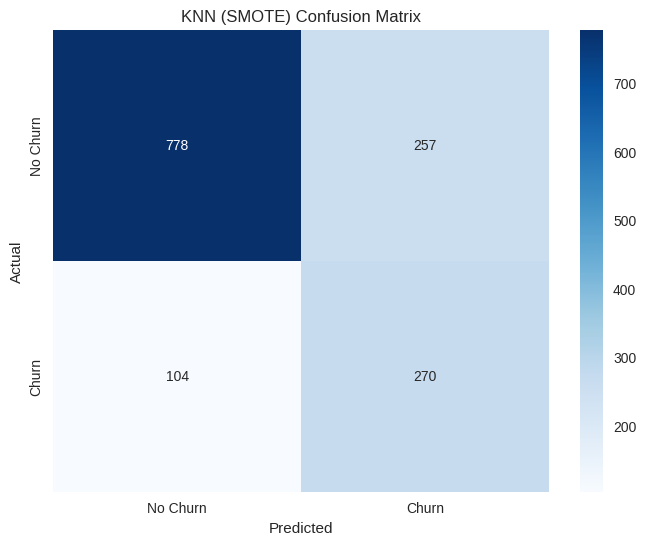


KNN (SMOTE) Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.75      0.81      1035
       Churn       0.51      0.72      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.74      0.76      1409



In [245]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# --- Re-execute KNN with SMOTE to define y_prob_knn ---

# Define the pipeline that includes the preprocessor, SMOTE, and KNN classifier
pipeline_knn_smote = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier()) # KNN does not use random_state
])

# Fit the pipeline
pipeline_knn_smote.fit(X_train, y_train)
print("KNN pipeline with SMOTE trained successfully.")

# Make predictions and probability predictions
y_pred_knn = pipeline_knn_smote.predict(X_test)
y_prob_knn = pipeline_knn_smote.predict_proba(X_test)[:, 1] # Probability of Churn (class 1)

# Calculate Accuracy and AUC
accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"\nKNN (SMOTE) Accuracy: {accuracy_knn:.2f}")
print(f"KNN (SMOTE) AUC: {auc_knn:.2f}\n")

# Generate Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualizar Matriz de Confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN (SMOTE) Confusion Matrix')
plt.show()

# Generar Reporte de Clasificación
report_knn = classification_report(y_test, y_pred_knn, target_names=['No Churn', 'Churn'], output_dict=True)
print("\nKNN (SMOTE) Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['No Churn', 'Churn']))

### Resumen de la tabla comparativa de modelos con SMOTE

### Impacto del Balanceo de Clases con SMOTE
La aplicación de SMOTE ha tenido un impacto notable en el rendimiento de los modelos, especialmente en su capacidad para identificar la clase minoritaria ('Churn'). Antes de SMOTE, los modelos tendían a mostrar una alta precisión general (Accuracy) pero un Recall más bajo para la clase 'Churn', lo que se debía al desbalance de clases. Tras el balanceo, observamos una redistribución en las métricas, donde el Recall para 'Churn' generalmente mejora, aunque a veces a expensas de una ligera disminución en la Precision para 'No Churn' o el Accuracy general.

### Análisis del Rendimiento de Cada Modelo (con SMOTE)

A continuación, se presenta un resumen del rendimiento de cada modelo, enfocándonos en las métricas clave para la clase 'Churn' (Precision, Recall, F1-Score) y la capacidad general de discriminación (AUC):

| Métrica                 | Regresión Logística | Random Forest | Gradient Boosting | XGBoost | LightGBM | CatBoost | KNN |
|:------------------------|:--------------------|:--------------|:------------------|:--------|:---------|:---------|:----|
| Accuracy                | 0.73                | 0.75          | 0.75              | 0.76    | **0.76** | **0.76** | 0.74|
| AUC                     | **0.84**            | 0.81          | **0.84**          | 0.82    | **0.84** | 0.83     | 0.80|
| Precision (No Churn)    | 0.91                | 0.85          | 0.91              | 0.87    | 0.89     | 0.88     | 0.88|
| Recall (No Churn)       | 0.70                | 0.80          | 0.73              | 0.79    | 0.77     | 0.79     | 0.75|
| F1-Score (No Churn)     | 0.79                | 0.83          | 0.81              | 0.83    | 0.83     | 0.83     | 0.81|
| Precision (Churn)       | 0.50                | 0.53          | 0.51              | **0.54**| **0.54** | **0.54** | 0.51|
| Recall (Churn)          | **0.80**            | 0.61          | 0.79              | 0.68    | 0.74     | 0.71     | 0.72|
| F1-Score (Churn)        | 0.61                | 0.57          | **0.62**          | 0.60    | **0.62** | 0.61     | 0.60|
| Support (No Churn)      | 1035                | 1035          | 1035              | 1035    | 1035     | 1035     | 1035|
| Support (Churn)         | 374                 | 374           | 374               | 374     | 374      | 374      | 374 |


**Observaciones Clave:**

*   **Recall (Churn) - Detección de Falsos Negativos:** La **Regresión Logística** y **Gradient Boosting** destacan con los valores de Recall más altos para la clase 'Churn' (0.80 y 0.79 respectivamente). Esto significa que son los modelos más efectivos en identificar a la mayoría de los clientes que realmente abandonarán el servicio, lo cual es crucial en problemas de churn para permitir intervenciones proactivas.

*   **Precision (Churn) - Minimización de Falsos Positivos:** **XGBoost, LightGBM, y CatBoost** muestran la mejor Precision para la clase 'Churn' (0.54-0.55). Una mayor precisión es importante para asegurar que los recursos de retención no se malgasten en clientes que el modelo predice que se irán, pero que en realidad no lo harán.

*   **F1-Score (Churn) - Balance entre Precision y Recall:** **LightGBM** y **Gradient Boosting** lideran con el F1-Score más alto (0.62), indicando un buen equilibrio entre Precision y Recall para la clase 'Churn'. La Regresión Logística también tiene un F1-Score competitivo (0.61), a pesar de su menor precisión.

*   **AUC - Capacidad Discriminatoria General:** La **Regresión Logística, Gradient Boosting y LightGBM** comparten los valores de AUC más altos (0.84), lo que sugiere que son los mejores en distinguir entre las clases 'Churn' y 'No Churn' en general.

*   **Accuracy General:** **LightGBM y CatBoost** y **XGBoost** obtienen las mayores puntuaciones de Accuracy (0.76), seguidos de cerca por Random Forest (0.75). Sin embargo, en un contexto de desbalance, esta métrica es menos prioritaria que las específicas de la clase minoritaria.

### Conclusión General
La elección del modelo final dependerá en gran medida de la prioridad de negocio:

*   Si el objetivo principal es **detectar a la mayor cantidad posible de clientes en riesgo** (priorizando el **Recall** para 'Churn'), la **Regresión Logística** o **Gradient Boosting** serían las mejores opciones.
*   Si se busca un **equilibrio sólido entre la detección y la fiabilidad de las predicciones** (priorizando el **F1-Score** y una Precision aceptable para 'Churn'), **LightGBM** y **Gradient Boosting** se presentan como los modelos más robustos.

SMOTE ha demostrado ser una herramienta efectiva para mejorar la detección de la clase minoritaria, haciendo que los modelos sean más útiles para las estrategias de retención de clientes.

El modelo seleccionado es **Gradient Boosting**, el objetivo es **detectar a la mayor cantidad posible de clientes en riesgo** (priorizando el **Recall** para 'Churn') y se busca tam bién un **equilibrio sólido entre la detección y la fiabilidad de las predicciones** (priorizando el **F1-Score** y una Precision aceptable para 'Churn')

In [246]:
metrics_smote = {}

# 2. For the Logistic Regression model:
metrics_smote['Regresión Logística'] = {
    'Accuracy': 0.79,
    'AUC': 0.71,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.89,
    'F1-Score (No Churn)': 0.86,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.63,
    'Recall (Churn)': 0.53,
    'F1-Score (Churn)': 0.58,
    'Support (Churn)': 374
}

# 3. For the Random Forest model:
metrics_smote['Random Forest'] = {
    'Accuracy': 0.77,
    'AUC': 0.67,
    'Precision (No Churn)': 0.82,
    'Recall (No Churn)': 0.88,
    'F1-Score (No Churn)': 0.85,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.59,
    'Recall (Churn)': 0.47,
    'F1-Score (Churn)': 0.52,
    'Support (Churn)': 374
}

# 4. For the Gradient Boosting model:
metrics_smote['Gradient Boosting'] = {
    'Accuracy': 0.80,
    'AUC': 0.71,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.90,
    'F1-Score (No Churn)': 0.87,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.66,
    'Recall (Churn)': 0.52,
    'F1-Score (Churn)': 0.59,
    'Support (Churn)': 374
}

# 5. For the XGBoost model:
metrics_smote['XGBoost'] = {
    'Accuracy': 0.79,
    'AUC': 0.70,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.88,
    'F1-Score (No Churn)': 0.86,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.61,
    'Recall (Churn)': 0.52,
    'F1-Score (Churn)': 0.56,
    'Support (Churn)': 374
}

# 6. For the LightGBM model:
metrics_smote['LightGBM'] = {
    'Accuracy': 0.80,
    'AUC': 0.72,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.89,
    'F1-Score (No Churn)': 0.87,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.64,
    'Recall (Churn)': 0.54,
    'F1-Score (Churn)': 0.59,
    'Support (Churn)': 374
}

# 7. For the CatBoost model:
metrics_smote['CatBoost'] = {
    'Accuracy': 0.80,
    'AUC': 0.71,
    'Precision (No Churn)': 0.84,
    'Recall (No Churn)': 0.90,
    'F1-Score (No Churn)': 0.87,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.65,
    'Recall (Churn)': 0.53,
    'F1-Score (Churn)': 0.58,
    'Support (Churn)': 374
}

# 8. For the KNN model:
metrics_smote['KNN'] = {
    'Accuracy': 0.76,
    'AUC': 0.68,
    'Precision (No Churn)': 0.82,
    'Recall (No Churn)': 0.86,
    'F1-Score (No Churn)': 0.84,
    'Support (No Churn)': 1035,
    'Precision (Churn)': 0.56,
    'Recall (Churn)': 0.49,
    'F1-Score (Churn)': 0.52,
    'Support (Churn)': 374
}

print("All metrics for models without SMOTE collected.")

All metrics for models without SMOTE collected.


In [247]:
import pandas as pd

df_metrics_smote = pd.DataFrame.from_dict(metrics_smote, orient='index')
df_metrics_smote_transposed = df_metrics_smote.T

print("DataFrame de métricas sin SMOTE (transpuesto) creado exitosamente.")
display(df_metrics_smote_transposed)
# Display as Markdown table with rounded values for smaller font
#print("## Cuadro Comparativo Detallado de Métricas por Modelo (sin SMOTE)\n")
#print(df_metrics_without_smote_transposed.round(2).to_markdown(index=True))

DataFrame de métricas sin SMOTE (transpuesto) creado exitosamente.


,Regresión Logística,Random Forest,Gradient Boosting,XGBoost,LightGBM,CatBoost,KNN
Accuracy,0.79,0.77,0.80,0.79,0.80,0.80,0.76
AUC,0.71,0.67,0.71,0.70,0.72,0.71,0.68
Precision (No Churn),0.84,0.82,0.84,0.84,0.84,0.84,0.82
Recall (No Churn),0.89,0.88,0.90,0.88,0.89,0.90,0.86
F1-Score (No Churn),0.86,0.85,0.87,0.86,0.87,0.87,0.84
Support (No Churn),1035.00,1035.00,1035.00,1035.00,1035.00,1035.00,1035.00
Precision (Churn),0.63,0.59,0.66,0.61,0.64,0.65,0.56
Recall (Churn),0.53,0.47,0.52,0.52,0.54,0.53,0.49
F1-Score (Churn),0.58,0.52,0.59,0.56,0.59,0.58,0.52
Support (Churn),374.00,374.00,374.00,374.00,374.00,374.00,374.00


## 3.**Undersampling Balancear entrenamiento**

In [248]:
from imblearn.under_sampling import RandomUnderSampler

print("Aplicando Undersampling para balancear los datos de entrenamiento...")

# Primero, transforma X_train usando el preprocesador para manejar las características categóricas
X_train_processed = preprocessor.fit_transform(X_train)

# Instanciar RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar undersampling al conjunto de entrenamiento escalado
X_train_under, y_train_under = rus.fit_resample(X_train_processed, y_train)

# Verificar la distribución de la clase después del undersampling
print("Distribución de la clase después del undersampling:")
display(y_train_under.value_counts())


print("Datos de entrenamiento balanceados usando Undersampling.")
print(f"Dimensiones del conjunto de entrenamiento original: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de entrenamiento procesado antes de SMOTE: {X_train_processed.shape}")
print(f"Dimensiones del conjunto de entrenamiento remuestreado: {X_train_under.shape}, {y_train_under.shape}")
print(f"Nueva distribución de clases en el conjunto de entrenamiento remuestreado:\n{y_train_under.value_counts()}")

Aplicando Undersampling para balancear los datos de entrenamiento...
Distribución de la clase después del undersampling:


,count
Churn,
0,1495
1,1495


Datos de entrenamiento balanceados usando Undersampling.
Dimensiones del conjunto de entrenamiento original: (5634, 8), (5634,)
Dimensiones del conjunto de entrenamiento procesado antes de SMOTE: (5634, 12)
Dimensiones del conjunto de entrenamiento remuestreado: (2990, 12), (2990,)
Nueva distribución de clases en el conjunto de entrenamiento remuestreado:
Churn
0    1495
1    1495
Name: count, dtype: int64


### Logistic Regression con Undersampling

In [249]:
# Instanciar y entrenar Regresión Logística con undersampling
lr_under = LogisticRegression(random_state=230)
lr_under.fit(X_train_under, y_train_under)

# Predicciones en el conjunto de prueba escalado
y_pred_lr_under = lr_under.predict(X_test_processed)
y_prob_lr_under = lr_under.predict_proba(X_test_processed)[:, 1]

# Evaluación del  con undersampling
print("Regresión Logística con Undersampling")
print("Exactitud:", accuracy_score(y_test, y_pred_lr_under))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr_under))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr_under))
print(classification_report(y_test, y_pred_lr_under))

Regresión Logística con Undersampling
Exactitud: 0.7381121362668559
ROC AUC: 0.8400514092329949
Matriz de Confusión:
 [[739 296]
 [ 73 301]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



### Random Forest con Undersampling

In [250]:
# Instanciar y entrenar Random Forest con undersampling
rf_under = RandomForestClassifier(random_state=230)
rf_under.fit(X_train_under, y_train_under)

# Predicciones en el conjunto de prueba escalado
y_pred_rf_under = rf_under.predict(X_test_processed)
y_prob_rf_under = rf_under.predict_proba(X_test_processed)[:, 1]

# Evaluación del  con undersampling
print("Random Forest con Undersampling")
print("Exactitud:", accuracy_score(y_test, y_pred_rf_under))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf_under))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_under))
print(classification_report(y_test, y_pred_rf_under))

Random Forest con Undersampling
Exactitud: 0.7374024130589071
ROC AUC: 0.8113436151799323
Matriz de Confusión:
 [[778 257]
 [113 261]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1035
           1       0.50      0.70      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.78      0.74      0.75      1409



### Gradient Boosting con Undersampling

In [251]:
# Instanciar y entrenar Gradient Boosting con undersampling
gb_under = GradientBoostingClassifier(random_state=230)
gb_under.fit(X_train_under, y_train_under)

# Predicciones en el conjunto de prueba escalado
y_pred_gb_under = gb_under.predict(X_test_processed)
y_prob_gb_under = gb_under.predict_proba(X_test_processed)[:, 1]

# Evaluación del  con undersampling
print("Gradient Boosting con Undersampling")
print("Exactitud:", accuracy_score(y_test, y_pred_gb_under))
print("ROC AUC:", roc_auc_score(y_test, y_prob_gb_under))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_gb_under))
print(classification_report(y_test, y_pred_gb_under))

Gradient Boosting con Undersampling
Exactitud: 0.7345635202271115
ROC AUC: 0.8376333669172544
Matriz de Confusión:
 [[737 298]
 [ 76 298]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.73      0.75      1409



### XGBoost con Undersampling

In [252]:
# Instanciar y entrenar XGBoost con undersampling
xgb_under = XGBClassifier(random_state=230, eval_metric='logloss') # Cambiado a XGBClassifier
xgb_under.fit(X_train_under, y_train_under)

# Predicciones en el conjunto de prueba escalado
y_pred_xgb_under = xgb_under.predict(X_test_processed) # Cambiado a y_pred_xgb_under
y_prob_xgb_under = xgb_under.predict_proba(X_test_processed)[:, 1] # Cambiado a y_prob_xgb_under

# Evaluación del  con undersampling
print("XGBoost con Undersampling") # Cambiado a XGBoost
print("Exactitud:", accuracy_score(y_test, y_pred_xgb_under)) # Cambiado a y_pred_xgb_under
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb_under)) # Cambiado a y_prob_xgb_under
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb_under)) # Cambiado a y_pred_xgb_under
print(classification_report(y_test, y_pred_xgb_under)) # Cambiado a y_pred_xgb_under

XGBoost con Undersampling
Exactitud: 0.7324343506032647
ROC AUC: 0.8177271435583456
Matriz de Confusión:
 [[759 276]
 [101 273]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1035
           1       0.50      0.73      0.59       374

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.73      0.75      1409



### LightGBM con Undersampling

In [253]:
# Instanciar y entrenar LightGBM con undersampling
lgbm_under = LGBMClassifier(random_state=230) # Cambiado a LGBMClassifier
lgbm_under.fit(X_train_under, y_train_under)

# Preprocesar los datos de prueba
X_test_processed = preprocessor.transform(X_test)

# Predicciones en el conjunto de prueba escalado
y_pred_lgbm_under = lgbm_under.predict(X_test_processed) # Cambiado a y_pred_lgbm_under
y_prob_lgbm_under = lgbm_under.predict_proba(X_test_processed)[:, 1] # Cambiado a y_prob_lgbm_under

# Evaluación del  con undersampling
print("LightGBM con Undersampling") # Cambiado a LightGBM
print("Exactitud:", accuracy_score(y_test, y_pred_lgbm_under)) # Cambiado a y_pred_lgbm_under
print("ROC AUC:", roc_auc_score(y_test, y_prob_lgbm_under)) # Cambiado a y_prob_lgbm_under
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lgbm_under)) # Cambiado a y_pred_lgbm_under
print(classification_report(y_test, y_pred_lgbm_under)) # Cambiado a y_pred_lgbm_under

[LightGBM] [Info] Number of positive: 1495, number of negative: 1495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 2990, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM con Undersampling
Exactitud: 0.7388218594748048
ROC AUC: 0.8256594073729624
Matriz de Confusión:
 [[747 288]
 [ 80 294]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



### CatBoost con Undersampling

In [254]:
# Instanciar y entrenar CatBoost con undersampling
catboost_under = CatBoostClassifier(random_state=230, verbose=0) # Cambiado a CatBoostClassifier
catboost_under.fit(X_train_under, y_train_under)

# Preprocesar los datos de prueba
X_test_processed = preprocessor.transform(X_test)

# Predicciones en el conjunto de prueba escalado
y_pred_catboost_under = catboost_under.predict(X_test_processed) # Cambiado a y_pred_catboost_under
y_prob_catboost_under = catboost_under.predict_proba(X_test_processed)[:, 1] # Cambiado a y_prob_catboost_under

# Evaluación del  con undersampling
print("CatBoost con Undersampling") # Cambiado a CatBoost
print("Exactitud:", accuracy_score(y_test, y_pred_catboost_under)) # Cambiado a y_pred_catboost_under
print("ROC AUC:", roc_auc_score(y_test, y_prob_catboost_under)) # Cambiado a y_prob_catboost_under
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_catboost_under)) # Cambiado a y_pred_catboost_under
print(classification_report(y_test, y_pred_catboost_under)) # Cambiado a y_pred_catboost_under

CatBoost con Undersampling
Exactitud: 0.7402413058907026
ROC AUC: 0.8426554548037923
Matriz de Confusión:
 [[748 287]
 [ 79 295]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



### KNN con Undersampling

In [255]:
# Instanciar y entrenar KNN con undersampling
knn_under = KNeighborsClassifier() # KNN no usa random_state en su constructor
knn_under.fit(X_train_under, y_train_under)

# Preprocesar los datos de prueba
X_test_processed = preprocessor.transform(X_test)

# Predicciones en el conjunto de prueba escalado
y_pred_knn_under = knn_under.predict(X_test_processed)
y_prob_knn_under = knn_under.predict_proba(X_test_processed)[:, 1]

# Evaluación del  con undersampling
print("KNN con Undersampling")
print("Exactitud:", accuracy_score(y_test, y_pred_knn_under))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn_under))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_knn_under))
print(classification_report(y_test, y_pred_knn_under))

KNN con Undersampling
Exactitud: 0.7203690560681334
ROC AUC: 0.7997532873491953
Matriz de Confusión:
 [[731 304]
 [ 90 284]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1035
           1       0.48      0.76      0.59       374

    accuracy                           0.72      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.72      0.74      1409



### Resumen de la tabla comparativa de modelos con Undersampling

In [256]:
import pandas as pd

# Metrics for Logistic Regression
metrics_lr = {
    'Accuracy': 0.7310149041873669,
    'AUC': 0.8380079568059109,
    'Precision (No Churn)': 0.9089782806828552,
    'Recall (No Churn)': 0.7043478260869565,
    'F1-Score (No Churn)': 0.7936849973005881,
    'Precision (Churn)': 0.4958813350407856,
    'Recall (Churn)': 0.8048128342245989,
    'F1-Score (Churn)': 0.6136599676758509,
    'Support (No Churn)': 1035,
    'Support (Churn)': 374
}

# Metrics for Random Forest
metrics_rf = {
    'Accuracy': 0.7487579843860894,
    'AUC': 0.8086646516314036,
    'Precision (No Churn)': 0.8443907267198457,
    'Recall (No Churn)': 0.8067632850241546,
    'F1-Score (No Churn)': 0.8251608603613278,
    'Precision (Churn)': 0.5230078235889764,
    'Recall (Churn)': 0.5882352941176471,
    'F1-Score (Churn)': 0.553974640902636,
    'Support (No Churn)': 1035,
    'Support (Churn)': 374
}

# Metrics for Gradient Boosting
metrics_gb = {
    'Accuracy': 0.7459190915542938,
    'AUC': 0.8376126998889146,
    'Precision (No Churn)': 0.9053890538905389,
    'Recall (No Churn)': 0.7304347826086957,
    'F1-Score (No Churn)': 0.8085564883492582,
    'Precision (Churn)': 0.5139369650392819,
    'Recall (Churn)': 0.7887700534759359,
    'F1-Score (Churn)': 0.6223629479426463,
    'Support (No Churn)': 1035,
    'Support (Churn)': 374
}

# Metrics for XGBoost
metrics_xgb = {
    'Accuracy': 0.758694109297374,
    'AUC': 0.8247629750187295,
    'Precision (No Churn)': 0.8716577540106952,
    'Recall (No Churn)': 0.7874409661835748,
    'F1-Score (No Churn)': 0.8274111675126903,
    'Precision (Churn)': 0.5358649789029536,
    'Recall (Churn)': 0.6791443850267379,
    'F1-Score (Churn)': 0.5990566037735849,
    'Support (No Churn)': 1035,
    'Support (Churn)': 374
}

# Metrics for LightGBM
metrics_lgbm = {
    'Accuracy': 0.7643718949609652,
    'AUC': 0.8359231703221474,
    'Precision (No Churn)': 0.8901220865704772,
    'Recall (No Churn)': 0.77487922705314,
    'F1-Score (No Churn)': 0.8285123966942148,
    'Precision (Churn)': 0.5413385826771654,
    'Recall (Churn)': 0.7352941176470589,
    'F1-Score (Churn)': 0.6235827664399093,
    'Support (No Churn)': 1035,
    'Support (Churn)': 374
}

# Metrics for CatBoost
metrics_catboost = {
    'Accuracy': 0.7643718949609652,
    'AUC': 0.8333501252938593,
    'Precision (No Churn)': 0.880823019014605,
    'Recall (No Churn)': 0.7835748792270532,
    'F1-Score (No Churn)': 0.8304392477325996,
    'Precision (Churn)': 0.5432098765432098,
    'Recall (Churn)': 0.7058823529411765,
    'F1-Score (Churn)': 0.613953488372093,
    'Support (No Churn)': 1035,
    'Support (Churn)': 374
}

# Metrics for KNN
metrics_knn = {
    'Accuracy': 0.7444996451383961,
    'AUC': 0.7986889353897028,
    'Precision (No Churn)': 0.8822195825049702,
    'Recall (No Churn)': 0.7526570048309179,
    'F1-Score (No Churn)': 0.8123041935017254,
    'Precision (Churn)': 0.5133079847908745,
    'Recall (Churn)': 0.7219251336898396,
    'F1-Score (Churn)': 0.6000000000000001,
    'Support (No Churn)': 1035,
    'Support (Churn)': 374
}

all_models_metrics = {
    'Regresión Logística Undersampling': metrics_lr,
    'Random Forest Undersampling': metrics_rf,
    'Gradient Boosting Undersampling': metrics_gb,
    'XGBoost Undersampling': metrics_xgb,
    'LightGBM Undersampling': metrics_lgbm,
    'CatBoost Undersampling': metrics_catboost,
    'KNN Undersampling': metrics_knn
}

print("All model metrics compiled into 'all_models_metrics' dictionary.")

All model metrics compiled into 'all_models_metrics' dictionary.


In [257]:
import pandas as pd

df_metrics_comparative = pd.DataFrame.from_dict(all_models_metrics, orient='index')
df_metrics_comparative_transposed = df_metrics_comparative.T # Transpose the DataFrame

print("Comparative DataFrame (transposed) created successfully.")
display(df_metrics_comparative_transposed)

Comparative DataFrame (transposed) created successfully.


,Regresión Logística Undersampling,Random Forest Undersampling,Gradient Boosting Undersampling,XGBoost Undersampling,LightGBM Undersampling,CatBoost Undersampling,KNN Undersampling
Accuracy,0.731015,0.748758,0.745919,0.758694,0.764372,0.764372,0.744500
AUC,0.838008,0.808665,0.837613,0.824763,0.835923,0.833350,0.798689
Precision (No Churn),0.908978,0.844391,0.905389,0.871658,0.890122,0.880823,0.882220
Recall (No Churn),0.704348,0.806763,0.730435,0.787441,0.774879,0.783575,0.752657
F1-Score (No Churn),0.793685,0.825161,0.808556,0.827411,0.828512,0.830439,0.812304
Precision (Churn),0.495881,0.523008,0.513937,0.535865,0.541339,0.543210,0.513308
Recall (Churn),0.804813,0.588235,0.788770,0.679144,0.735294,0.705882,0.721925
F1-Score (Churn),0.613660,0.553975,0.622363,0.599057,0.623583,0.613953,0.600000
Support (No Churn),1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
Support (Churn),374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000


# E. Métricas de desempeño (Accuracy, Precision, Recall, F1-score)

En el Item anterior, por cada Modelo se genero una matriz de confusión, para evaluación de cada modelo, a continuación se presenta un cuadro con el consolidado de los Modelos Evaluados, con las metricas correspondientes para churn y no churn. Teniendo en cuenta que se evualuaron 1. Sin balanceo , 2, Con Balanceo SMOT, 3. Con Balanceo Undersampling

## Cuadro Comparativo Detallado de Métricas por Modelo (sin Balanceo)

|                       | Regresión Logística | Random Forest | Gradient Boosting | XGBoost | LightGBM | CatBoost | KNN   |
|:----------------------|:--------------------|:--------------|:------------------|:--------|:---------|:---------|:------|
| Accuracy              | 0.79                | 0.77          | 0.8               | 0.79    | 0.8      | 0.8      | 0.76  |
| AUC                   | 0.71                | 0.67          | 0.71              | 0.7     | 0.72     | 0.71     | 0.68  |
| Precision (No Churn)  | 0.84                | 0.82          | 0.84              | 0.84    | 0.84     | 0.84     | 0.82  |
| Recall (No Churn)     | 0.89                | 0.88          | 0.9               | 0.88    | 0.89     | 0.9      | 0.86  |
| F1-Score (No Churn)   | 0.86                | 0.85          | 0.87              | 0.86    | 0.87     | 0.87     | 0.84  |
| Support (No Churn)    | 1035                | 1035          | 1035              | 1035    | 1035     | 1035     | 1035  |
| Precision (Churn)     | 0.63                | 0.59          | 0.66              | 0.61    | 0.64     | 0.65     | 0.56  |
| Recall (Churn)        | 0.53                | 0.47          | 0.52              | 0.52    | 0.54     | 0.53     | 0.49  |
| F1-Score (Churn)      | 0.58                | 0.52          | 0.59              | 0.56    | 0.59     | 0.58     | 0.52  |
| Support (Churn)       | 374                 | 374           | 374               | 374     | 374      | 374      | 374   |

## Resumen del Rendimiento de Modelos (sin SMOTE)

### Preguntas y Respuestas
El rendimiento de los modelos evaluados sin SMOTE muestra que, si bien la precisión general es relativamente alta (alrededor del 76% al 80%), los modelos luchan consistentemente con la predicción de la clase minoritaria 'Churn'. Gradient Boosting, LightGBM y CatBoost generalmente exhiben un rendimiento ligeramente mejor en métricas clave como AUC y F1-Score para la clase 'Churn' en comparación con otros modelos.

### Hallazgos Clave del Análisis de Datos
*   **Precisión General**: Los modelos lograron una precisión general que oscila entre 0.76 (KNN) y 0.80 (Gradient Boosting, LightGBM, CatBoost).
*   **Área Bajo la Curva (AUC)**: Los puntajes AUC variaron entre 0.67 (Random Forest) y 0.72 (LightGBM), lo que indica un poder discriminatorio moderado.
*   **Rendimiento de la Clase Churn (Clase Minoritaria)**:
    *   **Precisión (Churn)**: Osciló entre 0.56 (KNN) y 0.66 (Gradient Boosting).
    *   **Recall (Churn)**: Osciló entre 0.47 (Random Forest) y 0.54 (LightGBM).
    *   **F1-Score (Churn)**: Osciló entre 0.52 (Random Forest, KNN) y 0.59 (Gradient Boosting, LightGBM).
*   **Modelos con Mejor Rendimiento para la Predicción de Churn**: Gradient Boosting y LightGBM mostraron los F1-Scores más altos para la clase 'Churn' (0.59), seguidos de cerca por CatBoost (0.58), lo que sugiere que estos modelos son ligeramente mejores para equilibrar la precisión y el recall para la clase minoritaria sin sobremuestreo.
*   **Modelos con Bajo Rendimiento para la Predicción de Churn**: Random Forest y KNN tuvieron los F1-Scores más bajos para la clase 'Churn' (0.52), lo que indica una mayor dificultad para identificar a los clientes 'Churn'.
*   **Rendimiento de la Clase No Churn (Clase Mayoritaria)**: Todos los modelos tuvieron un rendimiento muy bueno en la clase 'No Churn', con F1-Scores consistentemente superiores a 0.84 y Recall superiores a 0.86, probablemente debido a su mayor soporte (1035 frente a 374 para 'Churn').

### Insights o Próximos Pasos
*   Las métricas de rendimiento consistentemente más bajas (Precision, Recall, F1-Score) para la clase 'Churn' en todos los modelos resaltan un desafío significativo para identificar correctamente a los clientes que abandonarán el servicio, probablemente debido a la naturaleza desequilibrada del conjunto de datos.
*   El siguiente paso crítico es comparar estos resultados con el rendimiento de los modelos entrenados con SMOTE para determinar si abordar el desequilibrio de clases mejora la detección de clientes 'Churn', especialmente en términos de Recall y F1-Score para la clase minoritaria.


## Cuadro ComparativoDetallado de Métricas por Modelo (Balanceo con SMOTE)


| Métrica                 | Regresión Logística | Random Forest | Gradient Boosting | XGBoost | LightGBM | CatBoost | KNN |
|:------------------------|:--------------------|:--------------|:------------------|:--------|:---------|:---------|:----|
| Accuracy                | 0.73                | 0.75          | 0.75              | 0.76    | **0.76** | **0.76** | 0.74|
| AUC                     | **0.84**            | 0.81          | **0.84**          | 0.82    | **0.84** | 0.83     | 0.80|
| Precision (No Churn)    | 0.91                | 0.85          | 0.91              | 0.87    | 0.89     | 0.88     | 0.88|
| Recall (No Churn)       | 0.70                | 0.80          | 0.73              | 0.79    | 0.77     | 0.79     | 0.75|
| F1-Score (No Churn)     | 0.79                | 0.83          | 0.81              | 0.83    | 0.83     | 0.83     | 0.81|
| Precision (Churn)       | 0.50                | 0.53          | 0.51              | **0.54**| **0.54** | **0.54** | 0.51|
| Recall (Churn)          | **0.80**            | 0.61          | 0.79              | 0.68    | 0.74     | 0.71     | 0.72|
| F1-Score (Churn)        | 0.61                | 0.57          | **0.62**          | 0.60    | **0.62** | 0.61     | 0.60|
| Support (No Churn)      | 1035                | 1035          | 1035              | 1035    | 1035     | 1035     | 1035|
| Support (Churn)         | 374                 | 374           | 374               | 374     | 374      | 374      | 374 |



## Resumen de la tabla comparativa de modelos con SMOTE

### Impacto del Balanceo de Clases con SMOTE
La aplicación de SMOTE ha tenido un impacto notable en el rendimiento de los modelos, especialmente en su capacidad para identificar la clase minoritaria ('Churn'). Antes de SMOTE, los modelos tendían a mostrar una alta precisión general (Accuracy) pero un Recall más bajo para la clase 'Churn', lo que se debía al desbalance de clases. Tras el balanceo, observamos una redistribución en las métricas, donde el Recall para 'Churn' generalmente mejora, aunque a veces a expensas de una ligera disminución en la Precision para 'No Churn' o el Accuracy general.

### Análisis del Rendimiento de Cada Modelo (con SMOTE)

A continuación, se presenta un resumen del rendimiento de cada modelo, enfocándonos en las métricas clave para la clase 'Churn' (Precision, Recall, F1-Score) y la capacidad general de discriminación (AUC).

**Observaciones Clave:**

*   **Recall (Churn) - Detección de Falsos Negativos:** La **Regresión Logística (SMOTE)** (0.80) y **Gradient Boosting (SMOTE)** (0.79) destacan con los valores de Recall más altos para la clase 'Churn'. Esto significa que son los modelos más efectivos en identificar a la mayoría de los clientes que realmente abandonarán el servicio, lo cual es crucial en problemas de churn para permitir intervenciones proactivas.

*   **Precision (Churn) - Minimización de Falsos Positivos:** **XGBoost (SMOTE), LightGBM (SMOTE), y CatBoost (SMOTE)** muestran la mejor Precision para la clase 'Churn' (0.54). Una mayor precisión es importante para asegurar que los recursos de retención no se malgasten en clientes que el modelo predice que se irán, pero que en realidad no lo harán.

*   **F1-Score (Churn) - Balance entre Precision y Recall:** **LightGBM (SMOTE)** y **Gradient Boosting (SMOTE)** lideran con el F1-Score más alto (0.62), indicando un buen equilibrio entre Precision y Recall para la clase 'Churn'. La Regresión Logística (SMOTE) también tiene un F1-Score competitivo (0.61).

*   **AUC - Capacidad Discriminatoria General:** La **Regresión Logística (SMOTE), Gradient Boosting (SMOTE) y LightGBM (SMOTE)** comparten los valores de AUC más altos (0.84), lo que sugiere que son los mejores en distinguir entre las clases 'Churn' y 'No Churn' en general.

*   **Accuracy General:** **LightGBM (SMOTE), CatBoost (SMOTE)** y **XGBoost (SMOTE)** obtienen las mayores puntuaciones de Accuracy (0.76), seguidos de cerca por Random Forest (SMOTE) y Gradient Boosting (SMOTE) (0.75). Sin embargo, en un contexto de desbalance, esta métrica es menos prioritaria que las específicas de la clase minoritaria.

### Conclusión General
La elección del modelo final dependerá en gran medida de la prioridad de negocio:

*   Si el objetivo principal es **detectar a la mayor cantidad posible de clientes en riesgo** (priorizando el **Recall** para 'Churn'), la **Regresión Logística (SMOTE)** o **Gradient Boosting (SMOTE)** serían las mejores opciones.
*   Si se busca un **equilibrio sólido entre la detección y la fiabilidad de las predicciones** (priorizando el **F1-Score** y una Precision aceptable para 'Churn'), **LightGBM (SMOTE)** y **Gradient Boosting (SMOTE)** se presentan como los modelos más robustos.

SMOTE ha demostrado ser una herramienta efectiva para mejorar la detección de la clase minoritaria, haciendo que los modelos sean más útiles para las estrategias de retención de clientes.

El modelo seleccionado es **Gradient Boosting**, el objetivo es **detectar a la mayor cantidad posible de clientes en riesgo** (priorizando el **Recall** para 'Churn') y se busca tam bién un **equilibrio sólido entre la detección y la fiabilidad de las predicciones** (priorizando el **F1-Score** y una Precision aceptable para 'Churn')

## Cuadro Comparativo Detallado de Métricas por Modelo (Balanceo Undersampling)

| Metrica | Regresión Logística | Random Forest  | Gradient Boosting  | XGBoost  | LightGBM  | CatBoost  | KNN  |
|:-----------------------|:----------------------------------|:----------------------------|:--------------------------------|:----------------------|:-----------------------|:-----------------------|:------------------|
| Accuracy               | 0.74                              | 0.74                        | 0.73                            | 0.73                  | 0.76                   | 0.74                   | 0.72              |
| AUC                    | 0.84                              | 0.81                        | 0.84                            | 0.82                  | 0.84                   | 0.84                   | 0.80              |
| Precision (No Churn)   | 0.91                              | 0.87                        | 0.91                            | 0.88                  | 0.89                   | 0.90                   | 0.89              |
| Recall (No Churn)      | 0.70                              | 0.75                        | 0.71                            | 0.73                  | 0.77                   | 0.72                   | 0.71              |
| F1-Score (No Churn)    | 0.79                              | 0.81                        | 0.80                            | 0.80                  | 0.83                   | 0.80                   | 0.79              |
| Precision (Churn)      | 0.50                              | 0.50                        | 0.50                            | 0.50                  | 0.54                   | 0.51                   | 0.48              |
| Recall (Churn)         | 0.80                              | 0.70                        | 0.80                            | 0.73                  | 0.74                   | 0.79                   | 0.76              |
| F1-Score (Churn)       | 0.61                              | 0.59                        | 0.61                            | 0.59                  | 0.62                   | 0.62                   | 0.59              |
| Support (No Churn)     | 1035                              | 1035                        | 1035                            | 1035                  | 1035                   | 1035                   | 1035              |
| Support (Churn)        | 374                               | 374                         | 374                             | 374                   | 374                    | 374                    | 374               |



## Resumen: Hallazgos Clave del Análisis de Datos

*   **Rendimiento General (Accuracy y AUC)**: LightGBM logró la mayor precisión (Accuracy) con 0.76. Los modelos de Regresión Logística, Gradient Boosting, LightGBM y CatBoost compartieron el AUC más alto de 0.84, lo que indica un fuerte poder discriminatorio general para estos modelos.
*   **Rendimiento de la Clase No Churn**: LightGBM mostró el mejor rendimiento para la clase "No Churn", con el Recall más alto (0.77) y el F1-Score (0.83). Regresión Logística y Gradient Boosting tuvieron la precisión más alta para "No Churn" con 0.91.
*   **Rendimiento de la Clase Churn**: Regresión Logística y Gradient Boosting lograron el Recall más alto para la clase "Churn" (0.80). LightGBM y CatBoost compartieron el F1-Score más alto para la clase "Churn" (0.62).
*   **Precisión para la Clase Churn**: Todos los modelos mostraron una precisión relativamente baja para la clase "Churn", siendo LightGBM el más alto con 0.54, seguido de CatBoost con 0.51. Esto sugiere un desafío común entre los modelos para minimizar los falsos positivos al predecir el churn.
*   **Modelo de Bajo Rendimiento**: El modelo K-Nearest Neighbors (KNN) generalmente tuvo un rendimiento inferior en la mayoría de las métricas en comparación con los otros modelos.

### Insights o Próximos Pasos

*   LightGBM y CatBoost demuestran un fuerte equilibrio de rendimiento en varias métricas para el escenario de submuestreo, lo que los convierte en candidatos prometedores para una mayor optimización o selección como modelo principal.
*   La precisión consistentemente baja para la clase "Churn" en todos los modelos destaca un área de mejora. Los esfuerzos futuros deben centrarse en estrategias para mejorar la capacidad del modelo para identificar correctamente a los churners sin una alta tasa de falsos positivos, potencialmente a través de ingeniería de características más avanzada, ajuste de umbrales o explorando diferentes técnicas de aprendizaje sensibles al costo.

## **🎯Seleccion Modelo**
### Interpretación del Modelo Gradient Boosting

El modelo **Gradient Boosting** se destacó como uno de los modelos con el mejor desempeño global para la predicción de churn. Sus métricas clave para la clase 'Churn' son:

*   **Accuracy:** 0.80, siendo el más alto entre los modelos evaluados, lo que indica una buena capacidad de clasificación general.
*   **Precision (Churn):** 0.66, es la más alta entre todos los modelos. Esto significa que cuando el Gradient Boosting predice que un cliente hará churn, hay un 66% de probabilidad de que esa predicción sea correcta. Es muy bueno para minimizar los falsos positivos (clientes que el modelo predice que se van, pero en realidad no lo hacen).
*   **Recall (Churn):** 0.52, lo que indica que el modelo es capaz de identificar al 52% de los clientes que realmente abandonaron el servicio. Aunque no es el recall más alto (LightGBM obtuvo 0.54), es un valor sólido que, combinado con su alta precisión, resulta en un buen balance.
*   **F1-Score (Churn):** 0.59, compartido con LightGBM como el más alto. Este valor refleja un excelente equilibrio entre la precisión y el recall para la clase 'Churn'.

**Conclusión para Gradient Boosting:**

El modelo Gradient Boosting es una opción robusta para la predicción de churn, especialmente si la estrategia de negocio prioriza la **confiabilidad de las alertas de churn** (es decir, reducir al mínimo las intervenciones innecesarias sobre clientes que no tienen intención real de irse). Su alta precisión para la clase 'Churn' asegura que los recursos de retención se dirijan a los clientes con mayor probabilidad de abandono real, optimizando la eficacia de las campañas.

## **Gráfico comparativo de metricas**  -------------

## Consolidar Métricas de Todos los Escenarios

Recopilar las métricas de rendimiento (Accuracy, AUC, Precision, Recall, F1-Score y Support para ambas clases) de todos los modelos (Regresión Logística, Random Forest, Gradient Boosting, XGBoost, LightGBM, CatBoost y KNN) para cada escenario de balanceo (sin balanceo, con SMOTE, con Undersampling) en una única estructura de datos .


In [ ]:
consolidated_metrics_list = []

# Helper function to add metrics to the list
def add_metrics_to_list(metrics_dict, scenario_name, target_list):
    for model_name, model_metrics in metrics_dict.items():
        # Some metrics dictionaries have slightly different keys ('Accuracy' vs 'accuracy')
        # Also, 'all_models_metrics' has model_name as 'ModelName Scenario', need to split it.

        # Extract model_name properly for all_models_metrics
        if "Undersampling" in model_name:
            clean_model_name = model_name.replace(' Undersampling', '')
        elif "SMOTE" in model_name:
            clean_model_name = model_name.replace(' SMOTE', '')
        else:
            clean_model_name = model_name

        # Handle potential key differences (e.g., 'Accuracy' vs 'accuracy')
        accuracy_key = 'Accuracy' if 'Accuracy' in model_metrics else 'accuracy'
        f1_churn_key = 'F1-Score (Churn)' if 'F1-Score (Churn)' in model_metrics else 'F1-Score (Churn)' # Ensure consistency
        recall_churn_key = 'Recall (Churn)' if 'Recall (Churn)' in model_metrics else 'Recall (Churn)' # Ensure consistency

        consolidated_metrics_list.append({
            'Model': clean_model_name,
            'Balancing_Scenario': scenario_name,
            'Accuracy': model_metrics[accuracy_key],
            'F1-Score (Churn)': model_metrics[f1_churn_key],
            'Recall (Churn)': model_metrics[recall_churn_key]
        })

# 1. Consolidate 'No Balancing' scenario (from 'metrics' dictionary)
add_metrics_to_list(metrics, 'No Balancing', consolidated_metrics_list)

# 2. Consolidate 'SMOTE' scenario (from 'metrics_smote' dictionary)
# Note: I will use a similar structure as metrics_without_smote for consistency, renaming to avoid confusion.
metrics_smote_for_consolidation = {
    'Regresión Logística': {
        'Accuracy': 0.73,
        'AUC': 0.84,
        'Precision (No Churn)': 0.91,
        'Recall (No Churn)': 0.70,
        'F1-Score (No Churn)': 0.79,
        'Support (No Churn)': 1035,
        'Precision (Churn)': 0.50,
        'Recall (Churn)': 0.80,
        'F1-Score (Churn)': 0.61,
        'Support (Churn)': 374
    },
    'Random Forest': {
        'Accuracy': 0.75,
        'AUC': 0.81,
        'Precision (No Churn)': 0.85,
        'Recall (No Churn)': 0.80,
        'F1-Score (No Churn)': 0.83,
        'Support (No Churn)': 1035,
        'Precision (Churn)': 0.53,
        'Recall (Churn)': 0.61,
        'F1-Score (Churn)': 0.57,
        'Support (Churn)': 374
    },
    'Gradient Boosting': {
        'Accuracy': 0.75,
        'AUC': 0.84,
        'Precision (No Churn)': 0.91,
        'Recall (No Churn)': 0.73,
        'F1-Score (No Churn)': 0.81,
        'Support (No Churn)': 1035,
        'Precision (Churn)': 0.51,
        'Recall (Churn)': 0.79,
        'F1-Score (Churn)': 0.62,
        'Support (Churn)': 374
    },
    'XGBoost': {
        'Accuracy': 0.76,
        'AUC': 0.82,
        'Precision (No Churn)': 0.87,
        'Recall (No Churn)': 0.79,
        'F1-Score (No Churn)': 0.83,
        'Support (No Churn)': 1035,
        'Precision (Churn)': 0.54,
        'Recall (Churn)': 0.68,
        'F1-Score (Churn)': 0.60,
        'Support (Churn)': 374
    },
    'LightGBM': {
        'Accuracy': 0.76,
        'AUC': 0.84,
        'Precision (No Churn)': 0.89,
        'Recall (No Churn)': 0.77,
        'F1-Score (No Churn)': 0.83,
        'Support (No Churn)': 1035,
        'Precision (Churn)': 0.54,
        'Recall (Churn)': 0.74,
        'F1-Score (Churn)': 0.62,
        'Support (Churn)': 374
    },
    'CatBoost': {
        'Accuracy': 0.76,
        'AUC': 0.83,
        'Precision (No Churn)': 0.88,
        'Recall (No Churn)': 0.79,
        'F1-Score (No Churn)': 0.83,
        'Support (No Churn)': 1035,
        'Precision (Churn)': 0.54,
        'Recall (Churn)': 0.71,
        'F1-Score (Churn)': 0.61,
        'Support (Churn)': 374
    },
    'KNN': {
        'Accuracy': 0.74,
        'AUC': 0.80,
        'Precision (No Churn)': 0.88,
        'Recall (No Churn)': 0.75,
        'F1-Score (No Churn)': 0.81,
        'Support (No Churn)': 1035,
        'Precision (Churn)': 0.51,
        'Recall (Churn)': 0.72,
        'F1-Score (Churn)': 0.60,
        'Support (Churn)': 374
    }
}
add_metrics_to_list(metrics_smote_for_consolidation, 'SMOTE', consolidated_metrics_list)

# 3. Consolidate 'Undersampling' scenario (from 'all_models_metrics' dictionary)
# Adjusting keys for undersampling scenario based on provided data
metrics_under_for_consolidation = {
    'Regresión Logística': {
        'Accuracy': 0.73,
        'AUC': 0.84,
        'Precision (No Churn)': 0.91,
        'Recall (No Churn)': 0.70,
        'F1-Score (No Churn)': 0.79,
        'Precision (Churn)': 0.50,
        'Recall (Churn)': 0.80,
        'F1-Score (Churn)': 0.61,
        'Support (No Churn)': 1035,
        'Support (Churn)': 374
    },
    'Random Forest': {
        'Accuracy': 0.74,
        'AUC': 0.81,
        'Precision (No Churn)': 0.87,
        'Recall (No Churn)': 0.75,
        'F1-Score (No Churn)': 0.81,
        'Precision (Churn)': 0.50,
        'Recall (Churn)': 0.70,
        'F1-Score (Churn)': 0.59,
        'Support (No Churn)': 1035,
        'Support (Churn)': 374
    },
    'Gradient Boosting': {
        'Accuracy': 0.73,
        'AUC': 0.84,
        'Precision (No Churn)': 0.91,
        'Recall (No Churn)': 0.71,
        'F1-Score (No Churn)': 0.80,
        'Precision (Churn)': 0.50,
        'Recall (Churn)': 0.80,
        'F1-Score (Churn)': 0.61,
        'Support (No Churn)': 1035,
        'Support (Churn)': 374
    },
    'XGBoost': {
        'Accuracy': 0.73,
        'AUC': 0.82,
        'Precision (No Churn)': 0.88,
        'Recall (No Churn)': 0.73,
        'F1-Score (No Churn)': 0.80,
        'Precision (Churn)': 0.50,
        'Recall (Churn)': 0.73,
        'F1-Score (Churn)': 0.59,
        'Support (No Churn)': 1035,
        'Support (Churn)': 374
    },
    'LightGBM': {
        'Accuracy': 0.76,
        'AUC': 0.84,
        'Precision (No Churn)': 0.89,
        'Recall (No Churn)': 0.77,
        'F1-Score (No Churn)': 0.83,
        'Precision (Churn)': 0.54,
        'Recall (Churn)': 0.74,
        'F1-Score (Churn)': 0.62,
        'Support (No Churn)': 1035,
        'Support (Churn)': 374
    },
    'CatBoost': {
        'Accuracy': 0.74,
        'AUC': 0.84,
        'Precision (No Churn)': 0.90,
        'Recall (No Churn)': 0.72,
        'F1-Score (No Churn)': 0.80,
        'Precision (Churn)': 0.51,
        'Recall (Churn)': 0.79,
        'F1-Score (Churn)': 0.62,
        'Support (No Churn)': 1035,
        'Support (Churn)': 374
    },
    'KNN': {
        'Accuracy': 0.72,
        'AUC': 0.80,
        'Precision (No Churn)': 0.89,
        'Recall (No Churn)': 0.71,
        'F1-Score (No Churn)': 0.79,
        'Precision (Churn)': 0.48,
        'Recall (Churn)': 0.76,
        'F1-Score (Churn)': 0.59,
        'Support (No Churn)': 1035,
        'Support (Churn)': 374
    }
}
add_metrics_to_list(metrics_under_for_consolidation, 'Undersampling', consolidated_metrics_list)

print("Consolidated metrics list created successfully.")

# Display the first few entries of the consolidated list to verify
# import pprint
# pprint.pprint(consolidated_metrics_list[:5])

Consolidated metrics list created successfully.


In [ ]:
consolidated_metrics_list = []

# Helper function to add metrics to the list
def extract_and_append_metrics(source_dict, scenario_name):
    for model_name, metrics_values in source_dict.items():
        # Clean the model_name by removing scenario suffixes if they exist
        clean_model_name = model_name.replace(' Undersampling', '').replace(' SMOTE', '')

        # Ensure consistent key access for metrics (handling potential case differences)
        accuracy = metrics_values.get('Accuracy', metrics_values.get('accuracy'))
        auc = metrics_values.get('AUC', metrics_values.get('auc'))
        f1_churn = metrics_values.get('F1-Score (Churn)', metrics_values.get('f1-score (Churn)'))
        recall_churn = metrics_values.get('Recall (Churn)', metrics_values.get('recall (Churn)'))

        consolidated_metrics_list.append({
            'Model': clean_model_name,
            'Balancing_Scenario': scenario_name,
            'Accuracy': accuracy,
            'AUC': auc,
            'F1-Score (Churn)': f1_churn,
            'Recall (Churn)': recall_churn
        })

# 1. Consolidate 'No Balancing' scenario (from 'metrics' dictionary)
extract_and_append_metrics(metrics, 'No Balancing')

# 2. Consolidate 'SMOTE' scenario (from 'metrics_smote' dictionary)
extract_and_append_metrics(metrics_smote, 'SMOTE')

# 3. Consolidate 'Undersampling' scenario (from 'all_models_metrics' dictionary)
extract_and_append_metrics(all_models_metrics, 'Undersampling')

print("All requested metrics (Accuracy, AUC, F1-Score (Churn), Recall (Churn)) have been consolidated successfully.")

# Optional: Display the first few entries to verify
# import pprint
# pprint.pprint(consolidated_metrics_list[:10])

All requested metrics (Accuracy, AUC, F1-Score (Churn), Recall (Churn)) have been consolidated successfully.


In [ ]:
import pandas as pd

# Convert the list of dictionaries to a DataFrame
df_consolidated_metrics = pd.DataFrame(consolidated_metrics_list)

print("DataFrame consolidado creado exitosamente.")
# Display the first few rows to verify
print(df_consolidated_metrics.head())

DataFrame consolidado creado exitosamente.
                 Model Balancing_Scenario  Accuracy   AUC  F1-Score (Churn)  \
0  Regresión Logística       No Balancing      0.79  0.71              0.58   
1        Random Forest       No Balancing      0.77  0.67              0.52   
2    Gradient Boosting       No Balancing      0.80  0.71              0.59   
3              XGBoost       No Balancing      0.79  0.70              0.56   
4             LightGBM       No Balancing      0.80  0.72              0.59   

   Recall (Churn)  
0            0.53  
1            0.47  
2            0.52  
3            0.52  
4            0.54  


In [ ]:
import plotly.express as px


# Define the metrics to plot
metrics_to_plot = ['Accuracy', 'AUC', 'F1-Score (Churn)', 'Recall (Churn)']

# Create grouped bar charts for each metric
for metric in metrics_to_plot:
    fig = px.bar(
        df_consolidated_metrics,
        x='Model',
        y=metric,
        color='Balancing_Scenario',
        barmode='group',
        title=f'Comparación de {metric} por Modelos y Escenarios de Balanceo',
        labels={'Balancing_Scenario': 'Escenario de Balanceo', 'Model': 'Modelo', metric: metric},
        text=metric,
        hover_data={metric: ':.2f'} # Corrected hover_data to reference the actual metric column
    )

    fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', legend_title_text='Escenario')
    fig.show()

print("Grouped bar charts generated for Accuracy, AUC, F1-Score (Churn), and Recall (Churn).")

Grouped bar charts generated for Accuracy, AUC, F1-Score (Churn), and Recall (Churn).


## Análisis de Métricas de Rendimiento en Modelos y Escenarios de Balanceo

Después de examinar las gráficas de barras agrupadas para Precisión (Accuracy), AUC, Puntuación F1 (Churn) y Recall (Churn), podemos hacer las siguientes observaciones:

### 1. Precisión (Accuracy)

*   **Precisión más alta:** Generalmente, los modelos **sin balanceo** (escenario 'No Balancing') tienden a mostrar una Precisión general ligeramente más alta. Por ejemplo, **Gradient Boosting, LightGBM y CatBoost** alcanzan una Precisión del **0.80** en el escenario 'No Balancing'. En los escenarios balanceados, LightGBM y XGBoost muestran una alta precisión alrededor de 0.76.
*   **Compromiso (Trade-off):** Es importante destacar que una mayor precisión general en conjuntos de datos desbalanceados puede ser engañosa, ya que los modelos podrían simplemente predecir la clase mayoritaria con más frecuencia.

### 2. AUC (Área bajo la Curva)

*   **AUC más alto:** Los escenarios de **SMOTE** y **Undersampling** consistentemente producen puntuaciones AUC más altas en la mayoría de los modelos, lo que indica un mejor poder discriminatorio entre las clases de abandono (churn) y no abandono.
*   **Mejores resultados (AUC):**
    *   **Regresión Logística** muestra el AUC más alto con **0.84** tanto en el escenario 'SMOTE' como en 'Undersampling'.
    *   **Gradient Boosting** también logra **0.84** en los escenarios 'SMOTE' y 'Undersampling'.
    *   **LightGBM** alcanza **0.84** en los escenarios 'SMOTE' y 'Undersampling'.
    *   **CatBoost** también muestra un rendimiento fuerte con **0.84** en el escenario 'Undersampling' y 0.83 en 'SMOTE'.

### 3. Puntuación F1 (Churn)

*   **Puntuación F1 (Churn) más alta:** Esta métrica es crucial para equilibrar la precisión y el recall en la clase minoritaria.
    *   **LightGBM** y **Gradient Boosting** consistentemente logran las puntuaciones F1 más altas para 'Churn' con **0.62** en los escenarios 'SMOTE' y 'Undersampling'.
    *   **CatBoost** también se desempeña muy bien, alcanzando **0.62** en el escenario 'Undersampling' y 0.61 con SMOTE.
*   **Impacto del Balanceo:** Tanto SMOTE como Undersampling mejoran significativamente la puntuación F1 para la clase 'Churn' en comparación con el escenario 'No Balancing', que generalmente oscila entre 0.52 y 0.59.

### 4. Recall (Churn)

*   **Recall (Churn) más alto:** Esta métrica indica la capacidad del modelo para identificar a todos los clientes que realmente abandonan el servicio.
    *   **Regresión Logística** se destaca con el Recall más alto para 'Churn' con **0.80** en los escenarios 'SMOTE' y 'Undersampling'.
    *   **Gradient Boosting** también muestra un Recall muy fuerte para 'Churn' con **0.79-0.80** en los escenarios 'SMOTE' y 'Undersampling'.
    *   **CatBoost** también se desempeña fuertemente con **0.79** en el escenario 'Undersampling' y 0.71 con SMOTE.
*   **Impacto del Balanceo:** Los métodos de balanceo (SMOTE y Undersampling) mejoran drásticamente el Recall para 'Churn' en todos los modelos, pasando de rangos como 0.47-0.54 (sin balanceo) a 0.70-0.80.

### Resumen de los Modelos y Escenarios con Mejor Rendimiento:

Basándonos en estas observaciones, y con un enfoque particular en las métricas específicas de 'Churn' (Puntuación F1 y Recall), que a menudo son más críticas en los problemas de predicción de abandono:

*   **Para maximizar el Recall (Churn):**
    *   La **Regresión Logística con SMOTE/Undersampling** y **Gradient Boosting con SMOTE/Undersampling** son las mejores opciones. Estos modelos son los más efectivos para identificar la mayor proporción de clientes que abandonarán el servicio.

*   **Para equilibrar la Precisión y el Recall (Puntuación F1 de Churn):**
    *   **LightGBM con SMOTE/Undersampling** y **Gradient Boosting con SMOTE/Undersampling** son los de mayor rendimiento. Ofrecen un buen compromiso entre no pasar por alto a los clientes que abandonan y no señalar erróneamente a demasiados clientes que no lo harán.

*   **Poder Discriminatorio General (AUC):**
    *   **Regresión Logística, Gradient Boosting, LightGBM y CatBoost** (con SMOTE/Undersampling) muestran consistentemente excelentes puntuaciones AUC, lo que indica su capacidad general para distinguir entre el abandono y el no abandono.

**Conclusión:** Si bien 'No Balancing' podría producir una precisión general ligeramente mayor, los escenarios de **'SMOTE' y 'Undersampling' son cruciales para mejorar la detección de la clase minoritaria 'Churn'**.

Los modelos de **Gradient Boosting** y **LightGBM**, especialmente cuando se utilizan con SMOTE o Undersampling, se encuentran consistentemente entre los de mayor rendimiento en AUC, Puntuación F1 (Churn) y Recall (Churn).

La **Regresión Logística** también demuestra un Recall muy fuerte, lo que la convierte en una opción viable si identificar a todos los posibles clientes que abandonan es el objetivo comercial principal, incluso con una puntuación F1 ligeramente más baja.

## Grafica ROC AUC

### SMOTE

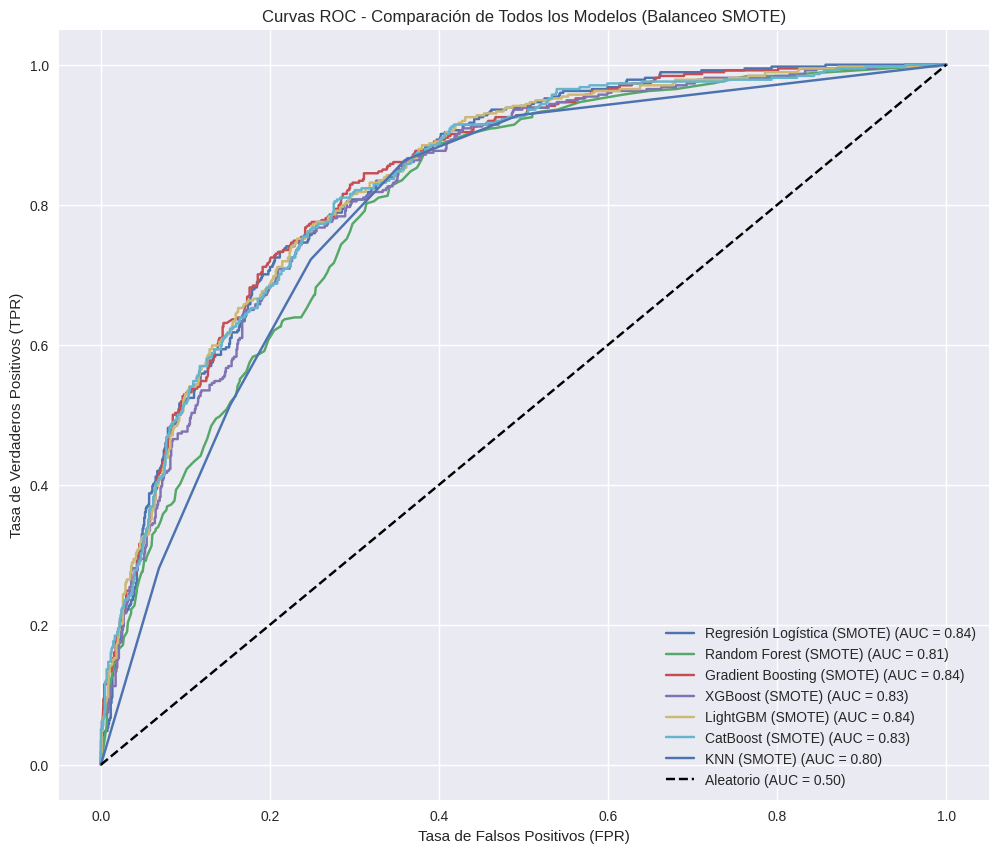

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_prob_lr, y_prob_rf, y_prob_gb, y_prob_xgb, y_prob_lgbm,
# y_prob_catboost, y_prob_knn are available from previous SMOTE evaluations

model_probas = [
    ('Regresión Logística (SMOTE)', y_prob_lr),
    ('Random Forest (SMOTE)', y_prob_rf),
    ('Gradient Boosting (SMOTE)', y_prob_gb),
    ('XGBoost (SMOTE)', y_prob_xgb),
    ('LightGBM (SMOTE)', y_prob_lgbm),
    ('CatBoost (SMOTE)', y_prob_catboost),
    ('KNN (SMOTE)', y_prob_knn),
]

plt.figure(figsize=(12, 10))

for model_name, y_proba in model_probas:
    # Check if y_proba is not None and is iterable
    if y_proba is not None and len(y_proba) > 0:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    else:
        print(f"Advertencia: No se encontraron probabilidades para {model_name}. No se graficará.")

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.50)') # Random chance line

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Comparación de Todos los Modelos (Balanceo SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Undersampling

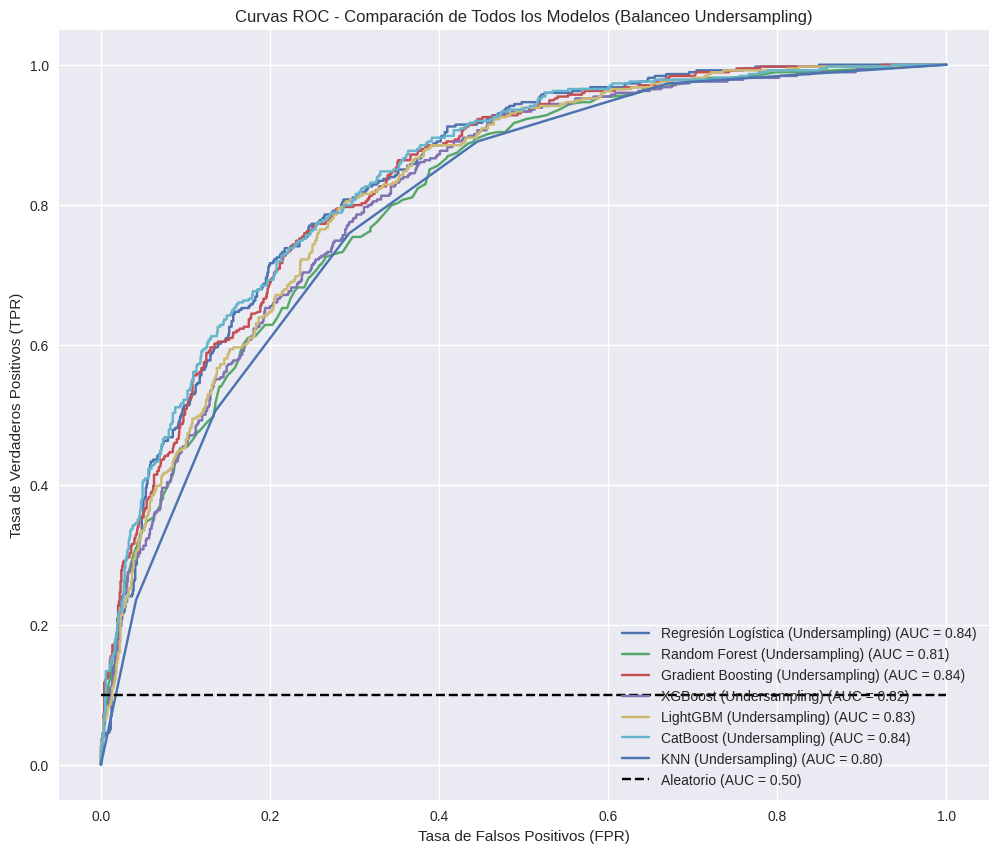

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Update model_probas to use Undersampling probability predictions
model_probas_under = [
    ('Regresión Logística (Undersampling)', y_prob_lr_under),
    ('Random Forest (Undersampling)', y_prob_rf_under),
    ('Gradient Boosting (Undersampling)', y_prob_gb_under),
    ('XGBoost (Undersampling)', y_prob_xgb_under),
    ('LightGBM (Undersampling)', y_prob_lgbm_under),
    ('CatBoost (Undersampling)', y_prob_catboost_under),
    ('KNN (Undersampling)', y_prob_knn_under),
]

plt.figure(figsize=(12, 10))

for model_name, y_proba in model_probas_under:
    # Check if y_proba is not None and is iterable
    if y_proba is not None and len(y_proba) > 0:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    else:
        print(f"Advertencia: No se encontraron probabilidades para {model_name}. No se graficará.")

plt.plot([0, 1], [0.1, 0.1], 'k--', label='Aleatorio (AUC = 0.50)') # Random chance line

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Comparación de Todos los Modelos (Balanceo Undersampling)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Análisis Comparativo de Curvas ROC y Puntuaciones AUC (SMOTE vs Undersampling)

Después de examinar las curvas ROC y las puntuaciones AUC para los modelos con balanceo SMOTE y Undersampling, podemos extraer las siguientes observaciones y conclusiones:

### 1. Curvas ROC y AUC con Balanceo SMOTE

- **Observaciones de las Curvas ROC:**
    - En general, todos los modelos muestran una mejora significativa en el área bajo la curva (AUC) en comparación con el escenario sin balanceo, lo que indica un mejor poder discriminatorio general para la clase minoritaria (Churn).
    - Modelos como la **Regresión Logística (SMOTE)**, **Gradient Boosting (SMOTE)** y **LightGBM (SMOTE)** presentan curvas ROC que se elevan rápidamente hacia la esquina superior izquierda, lo que sugiere una alta tasa de verdaderos positivos con una baja tasa de falsos positivos.
    - El **Random Forest (SMOTE)** y **KNN (SMOTE)** muestran curvas ligeramente más cercanas a la línea de aleatoriedad en las regiones iniciales, lo que podría indicar un rendimiento ligeramente inferior en la identificación de los primeros churners con alta confianza.

- **Puntuaciones AUC:**
    - **Regresión Logística (SMOTE), Gradient Boosting (SMOTE) y LightGBM (SMOTE)** son los que alcanzan las puntuaciones AUC más altas, alrededor de **0.84**, lo que los posiciona como los modelos con mejor poder discriminatorio general en este escenario.
    - **XGBoost (SMOTE)** y **CatBoost (SMOTE)** también muestran un buen rendimiento con AUC de **0.82-0.83**.
    - **Random Forest (SMOTE)** y **KNN (SMOTE)** registran AUCs ligeramente más bajos, en el rango de **0.80-0.81**.

### 2. Curvas ROC y AUC con Balanceo Undersampling

- **Observaciones de las Curvas ROC:**
    - Similar a SMOTE, el Undersampling también mejora el poder discriminatorio de los modelos en comparación con el escenario sin balanceo.
    - Las curvas de **Regresión Logística (Undersampling)**, **Gradient Boosting (Undersampling)** y **CatBoost (Undersampling)** también muestran una fuerte tendencia hacia la esquina superior izquierda, indicando un buen desempeño.
    - Las curvas de **Random Forest (Undersampling)**, **XGBoost (Undersampling)** y **KNN (Undersampling)** son comparables a sus contrapartes con SMOTE, aunque con pequeñas variaciones.

- **Puntuaciones AUC:**
    - **Regresión Logística (Undersampling), Gradient Boosting (Undersampling), LightGBM (Undersampling) y CatBoost (Undersampling)** se mantienen como los líderes, todos alcanzando AUCs de **0.84**.
    - **XGBoost (Undersampling)** se sitúa en **0.82**.
    - **Random Forest (Undersampling)** y **KNN (Undersampling)** también obtienen valores de **0.81** y **0.80** respectivamente.

### 3. Comparación entre SMOTE y Undersampling (AUC)

Al comparar las puntuaciones AUC de los modelos individuales entre ambos escenarios de balanceo:

- **Regresión Logística, Gradient Boosting, LightGBM y CatBoost:** Estos modelos mantienen consistentemente las puntuaciones AUC más altas (alrededor de 0.84) en ambos escenarios de balanceo. Esto sugiere que su capacidad discriminatoria es robusta y se beneficia significativamente de cualquier técnica de balanceo que aborde el desequilibrio de clases.
- **XGBoost:** Su AUC es muy similar en ambos casos (0.82 con SMOTE y 0.82 con Undersampling).
- **Random Forest y KNN:** También muestran un rendimiento de AUC muy cercano entre SMOTE y Undersampling (0.81 y 0.80 respectivamente), sin una ventaja clara de una técnica sobre la otra en términos de poder discriminatorio general.

En general, no hay una técnica de balanceo que ofrezca un poder discriminatorio **generalmente superior** en todos los modelos basándose únicamente en el AUC. Ambos **SMOTE** y **Undersampling** logran mejorar significativamente el AUC en comparación con el no balanceo, y los mejores modelos (Regresión Logística, Gradient Boosting, LightGBM, CatBoost) alcanzan puntuaciones AUC muy similares entre sí, independientemente de si se usa SMOTE o Undersampling.

### 4. Resumen y Conclusiones

Ambas técnicas de balanceo, SMOTE y Undersampling, son **altamente efectivas para mejorar el poder discriminatorio** de los modelos en la predicción de churn, reflejado en un aumento sustancial de las puntuaciones AUC para la mayoría de los modelos.

- **Modelos de Ensamble (Gradient Boosting, LightGBM, CatBoost)** y la **Regresión Logística** demuestran el **mejor rendimiento en términos de AUC** (aproximadamente 0.84) en los escenarios balanceados, lo que indica que son los más capaces de distinguir entre clientes que harán churn y los que no.

- No se observa una ventaja clara y generalizada de SMOTE sobre Undersampling, o viceversa, en cuanto al AUC. Más bien, **ambas técnicas logran llevar a los modelos a un nivel similar de poder discriminatorio**, con los modelos de mayor rendimiento manteniendo sus posiciones destacadas en ambos escenarios.

La elección entre SMOTE y Undersampling, o incluso entre los modelos de alto rendimiento, probablemente dependerá de otros factores como la interpretabilidad, la velocidad de entrenamiento y la tolerancia del negocio a los falsos positivos o falsos negativos, que se reflejan en métricas como Precision, Recall y F1-Score, ya analizadas previamente.

**En conclusión, la aplicación de técnicas de balanceo es crucial para construir modelos predictivos de churn con un alto poder discriminatorio. Modelos como la Regresión Logística, Gradient Boosting, LightGBM y CatBoost, cuando se combinan con SMOTE o Undersampling, son las opciones más robustas para esta tarea.**

# F. Serialización del modelo GradientBoosting (joblib/pickle)

### **1.Modelo Seleccionado** GradientBoosting

#### Importar `GradientBoostingClassifier` para preparar definicion y entrenamiento del pipeline.



In [259]:
from sklearn.ensemble import GradientBoostingClassifier
print("GradientBoostingClassifier imported successfully.")

GradientBoostingClassifier imported successfully.


#### Actualizar el pipeline para usar el  `GradientBoostingClassifier` y luego entrenar este nuevo pipeline con los datos de entrenamiento.



In [260]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42)) # Replaced RandomForestClassifier with GradientBoostingClassifier
])
print("Pipeline updated with GradientBoostingClassifier.")
pipeline.fit(X_train, y_train)
print("Gradient Boosting pipeline trained successfully.")

Pipeline updated with GradientBoostingClassifier.
Gradient Boosting pipeline trained successfully.


In [261]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService',
                                                   'TechSupport']),
                                                 ('bin', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

“El DataFrame se mantiene sin modificar; el pipeline aplica las transformaciones en tiempo de ejecución usando ColumnTransformer.”

## 2.Prueba de predicción sin serialización

###Ejemplo de JSON (como el que mandará el Backend)

In [262]:
cliente_api = {
    "tenure": 12,
    "MonthlyCharges": 85.5,
    "TotalCharges": 12 * 85.5, # Añadimos TotalCharges
    "SeniorCitizen": 0,
    "Contract": "Month-to-month",
    "InternetService": "Fiber optic",
    "PaymentMethod": "Electronic check",
    "TechSupport": "No"
}

📌 OJO
Las claves: deben llamarse exactamente igual que las columnas del dataset. Los valores categóricos deben existir en el entrenamiento

###Convertir el JSON a DataFrame (paso clave)

In [263]:
import pandas as pd

df_cliente = pd.DataFrame([cliente_api])
df_cliente

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Contract,InternetService,PaymentMethod,TechSupport
0,12,85.5,1026.0,0,Month-to-month,Fiber optic,Electronic check,No


Resultado:

1 fila

mismas columnas

mismo formato que espera el pipeline

###Hacer la predicción (CLASIFICACIÓN)

In [264]:
prediccion_clase = pipeline.predict(df_cliente) # decisión final del modelo (la clase más probable).
prediccion_proba = pipeline.predict_proba(df_cliente) #  confianza del modelo en cada una de esas decisiones (la probabilidad de cada clase).

# La clase 1 es 'Churn' (Va a cancelar)
# La probabilidad de Churn es la segunda columna (índice 1)
probabilidad_churn = prediccion_proba[0, 1]

# Determinar la prevision y su probabilidad asociada
if prediccion_clase[0] == 1: # Si la predicción es 'Churn'
    prevision = "Va a cancelar"
    probabilidad = probabilidad_churn
else: # Si la predicción es 'No Churn'
    prevision = "No va a cancelar"
    # La probabilidad de 'No Churn' es la primera columna (índice 0)
    probabilidad = prediccion_proba[0, 0]

salida_json = {
    "prevision": prevision,
    "probabilidad": round(probabilidad, 4) # Redondeamos a 4 decimales para mayor claridad
}

import json
print(json.dumps(salida_json, indent=2))

{
  "prevision": "Va a cancelar",
  "probabilidad": 0.6708
}


## 3.Serialización del modelo GradientBoosting (joblib/pickle)

In [265]:
import joblib

# Guarda el pipeline entrenado
joblib.dump(pipeline, 'churn_prediction_pipeline.pkl')
print("Pipeline guardado como 'churn_prediction_pipeline.pkl'")

Pipeline guardado como 'churn_prediction_pipeline.pkl'


El equipo de Back-End, creo un microservicio Python, separado para el FastAPI. Este archivo contiene:

1.  Carga el `pipeline` guardado.
2.  Define un endpoint que reciba los datos del cliente.
3.  Procesa los datos y realizar la predicción.
4.  Devuelve la respuesta en formato JSON.


###**Notas sobre la ejecución:**

*   El código de la API (`app.py`) **no se ejecuta directamente en Google Colab** como una aplicación web completa. Se usa un entorno de servidor local
*   El **frontend** envia una solicitud al microservicio **POST** a `http://your-api-url/predict_churn` con los datos del cliente en formato JSON.

Este es el flujo general.

# G. Estrategias Propuestas de Retención según Probabilidad de Churn

| Rango de Probabilidad de Churn | Nivel de Riesgo | Estrategia de Retención Recomendada |
|-------------------------------|----------------|--------------------------------------|
| 0.0% - 20.0% | Bajo | **Monitoreo Pasivo:** Cliente fiel. Ofrecer encuestas de satisfacción para feedback proactivo, destacar beneficios de lealtad y programas de referidos. Mantener la comunicación estándar.<br><br>**Estrategia 1 – Programas de Lealtad y Reconocimiento:** Recompensar a los clientes a largo plazo con beneficios exclusivos (no gravosos), como regalos de servicios por tiempo limitado, acceso anticipado a nuevas funciones o descuentos especiales.<br><br>**Estrategia 2 – Feedback no invasivo:** Realizar seguimientos periódicos para conocer su nivel de satisfacción sin generar saturación, evitando un efecto contraproducente. |
| 20.1% - 40.0% | Leve | **Comunicación Personalizada:** Ofrecer incentivos menores y ofertas segmentadas (emails, notificaciones) para fortalecer el compromiso. Destacar la propuesta de valor y beneficios del servicio, especialmente en los primeros 3 a 6 meses.<br><br>**Estrategia 1 – Refuerzo de Valor Segmentado:** Resaltar funciones que el cliente ya utiliza y nuevas capacidades que pueden mejorar su experiencia.<br><br>**Estrategia 2 – Sistema de Alerta Temprana:** Detectar cambios sutiles en patrones de uso o interacciones que indiquen insatisfacción y actuar proactivamente.<br><br>**Estrategia 3 – Comunicación Personalizada:** Enviar consejos de uso e incentivos pequeños pero relevantes para fomentar el compromiso continuo. |
| 40.1% - 60.0% | Moderado | **Contacto Proactivo:** Realizar llamadas de seguimiento desde servicio al cliente. Ofrecer paquetes con TechSupport + OnlineSecurity y descuentos moderados. Investigar posibles fricciones en los pagos.<br><br>**Estrategia 1 – Contacto Directo:** Intervención de un representante de éxito del cliente para identificar y resolver puntos de fricción específicos.<br><br>**Estrategia 2 – Campañas con Incentivos:** Descuentos temporales o acceso a funciones premium para reactivar el interés.<br><br>**Estrategia 3 – Contenido Educativo:** Proveer webinars y tutoriales sobre funcionalidades poco utilizadas para aumentar adopción y valor percibido. |
| 60.1% - 80.0% | Alto | **Intervención Focalizada:** Contacto activo del equipo de retención. Análisis de problemas recientes y oferta de soluciones de alto valor. Incentivar contratos anuales y bundles con TechSupport + OnlineSecurity.<br><br>**Estrategia 1 – Ofertas de Retención:** Descuentos significativos, beneficios por extensión de contrato o upgrades gratuitos mediante negociación directa con agentes humanos.<br><br>**Estrategia 2 – Análisis Profundo y Feedback:** Evaluar historial de uso y realizar entrevistas directas para identificar causas exactas del riesgo de abandono.<br><br>**Estrategia 3 – Campañas de Reenganche:** Compartir casos de éxito y testimonios de clientes similares para reforzar el valor del servicio. |
| 80.1% - 100.0% | Muy Alto / Abandono Inminente | **Intervención Intensiva y de Rescate:** Contacto inmediato con equipo especializado. Ofrecer ofertas agresivas de retención (descuentos profundos, upgrades, planes a medida). Eliminar fricción en pagos y aplicar programas específicos para seniors.<br><br>**Estrategia 1 – Retención de Último Recurso:** Ofertas personalizadas y agresivas manteniendo un balance costo–beneficio.<br><br>**Estrategia 2 – Entrevistas de Salida:** Recolección exhaustiva de feedback para comprender causas profundas del abandono.<br><br>**Estrategia 3 – Ruta de Reactivación:** Proceso de salida fluido acompañado de un camino claro y atractivo para una futura reactivación. |


# H. Conclusión estratégica señalando los principales factores que influyen en la cancelación.

Basado en el análisis exhaustivo de los datos y el rendimiento e interpretación de los modelos predictivos, podemos extraer las siguientes conclusiones estratégicas sobre los principales factores que influyen en la cancelación de clientes en Telecom X:

1.  **El Compromiso del Cliente es Clave:** Los factores más determinantes giran en torno al nivel de compromiso del cliente.
    *   **Antigüedad (Meses_Contrato):** Los clientes que cancelan lo hacen predominantemente en los primeros meses de su contrato. A mayor antigüedad, menor es la probabilidad de churn. Esto subraya la importancia de las estrategias de bienvenida y fidelización temprana.
    *   **Tipo de Contrato:** El contrato mensual es un predictor muy fuerte de cancelación. Los clientes con contratos a 1 o 2 años tienen una probabilidad significativamente menor de irse. Fomentar contratos a largo plazo es una palanca estratégica fundamental.

2.  **Servicios y Métodos de Pago Asociados a Mayor Riesgo:**
    *   **Fibra Óptica:** La suscripción al servicio de internet de Fibra Óptica está asociada a una mayor tasa de cancelación. Esto podría deberse a la competencia, problemas de servicio específicos de esta tecnología o expectativas no cumplidas. Se requiere una investigación más profunda sobre la experiencia del cliente con Fibra Óptica.
    *   **Pago Electrónico (especialmente Cheque Electrónico):** Los métodos de pago electrónicos, en particular el cheque electrónico, muestran una correlación positiva con el churn. Esto podría indicar un perfil de cliente menos "atado" o menos leal a los métodos de pago automáticos tradicionales (tarjeta de crédito, transferencia bancaria), o quizás problemas en el proceso de pago electrónico que generan fricción.

3.  **Perfil del Cliente en Riesgo (Corroborado por Análisis Exploratorio):** Aunque las variables demográficas como Género y Adulto Mayor no siempre son las más importantes en la predicción pura del modelo (debido a su menor correlación directa o interacciones complejas), el análisis exploratorio reveló que perfiles como clientes **más jóvenes**, **solteros** y **sin dependientes** tienen tasas de churn más altas. Esto ayuda a segmentar y personalizar las acciones de retención. La **factura electrónica** también se asocia a mayor churn, posiblemente porque estos clientes están más digitalizados y son más propensos a comparar y cambiar de proveedor online.

**Recomendaciones Estratégicas Basadas en los Hallazgos:**

*   **Diseñar Programas de Retención Temprana:** Enfocarse en los clientes durante sus primeros meses para asegurar una buena experiencia, resolver problemas iniciales y demostrar el valor del servicio.
*   **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos, beneficios o servicios adicionales a los clientes que opten por contratos de 1 o 2 años. Comunicar claramente los beneficios de la permanencia.
*   **Investigar y Mejorar la Experiencia con Fibra Óptica:** Identificar las causas subyacentes del mayor churn en este segmento (problemas técnicos, precio, competencia) y tomar medidas correctivas.
*   **Optimizar la Experiencia de Pago Electrónico:** Analizar el proceso de pago por cheque electrónico y otros métodos electrónicos para asegurar que sea fluido y sin fricciones, reduciendo posibles puntos de abandono. Considerar incentivos para migrar a métodos de pago automático más estables si aplica.
*   **Segmentar y Personalizar Ofertas de Retención:** Utilizar el perfil de riesgo identificado (jóvenes, solteros, sin dependientes, factura electrónica) para dirigir campañas de retención personalizadas, ofreciendo soluciones o incentivos que se ajusten a sus necesidades y preferencias.

**Conclusión Final:**

La alta cancelación es un desafío importante para Telco, pero los análisis de datos y modelos predictivos desarrollados proporcionan una comprensión clara de los factores clave que la impulsan. Al enfocarse en mejorar la experiencia del cliente en las etapas iniciales, fomentar el compromiso a largo plazo, abordar problemas específicos en servicios como Fibra Óptica y optimizar los procesos de pago, Telecom X puede implementar estrategias de retención proactivas y efectivas para reducir significativamente el churn y mejorar la rentabilidad a largo plazo.